In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import re
import nltk
from wordcloud import WordCloud
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import time 
import contractions
from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.linear_model import LogisticRegression
from textblob import TextBlob
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing  import LabelEncoder


### Importing of Kaggle Repository Twitter Dataset

In this Classification Task, we are trying to train a model to classify our crawled dataset whether the tweets are subjective or objective, positive or negative sentiments

In [2]:
df_tweet = pd.read_csv("Tweet.csv")

In [3]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717964 entries, 0 to 3717963
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   tweet_id     int64 
 1   writer       object
 2   post_date    int64 
 3   body         object
 4   comment_num  int64 
 5   retweet_num  int64 
 6   like_num     int64 
dtypes: int64(5), object(2)
memory usage: 198.6+ MB


In [4]:
df_tweet.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [5]:
df_company_tweet = pd.read_csv("Company_Tweet.csv")

In [6]:
df_company_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336445 entries, 0 to 4336444
Data columns (total 2 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tweet_id       int64 
 1   ticker_symbol  object
dtypes: int64(1), object(1)
memory usage: 66.2+ MB


In [7]:
df_company_tweet.head()

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL


In [8]:
tweets = pd.merge(df_company_tweet,df_tweet,on= "tweet_id", how = "inner")

In [9]:
tweets.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
0,550803612197457920,AAPL,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
1,550803612197457920,AMZN,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
2,550803610825928706,AAPL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
3,550803610825928706,GOOGL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
4,550803610825928706,AMZN,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1


### Importing of Crawled Twitter Dataset

This is the crawled dataset from twitter with regards to stocks such as AAPL, AMZN, MSFT, TSLA, GOOGL

In [10]:
crawled_tweets = pd.read_csv('test_data.csv')

In [11]:
crawled_tweets.tail()

,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,retweet_num,tweet_activity,url_cnt,emoticons,emojis,emo_cnt,word_count,clean_text,subjectivity,sentiment,moderator,clean_text_no_stem_user
4293,TSLA,2023-02-28 23:25:43+00:00,1.630711e+18,BestTrader01,"$TSLA #TSLA Options Interest! $800sssss, 600ss...",59,7,5,71,1,[],{},0,10,tsla tsla option interest 800sssss 600sss 300s...,0,0.0,NaN,TSLA TSLA Options Interest 800sssss 600sss 300...
4294,TSLA,2023-02-28 23:23:40+00:00,1.630710e+18,MatchasmMatt,$RIVN down nearly 10% after earnings. These co...,84,10,2,96,0,[],{},0,10,rivn nearli 10 earn compani make tsla look goo...,1,0.0,NaN,RIVN nearly 10 earnings These companies making...
4295,TSLA,2023-02-28 23:20:10+00:00,1.630709e+18,susanblas,No surprise here. $TSLA does not give a flying...,39,0,11,50,0,[],{},0,8,surpris tsla give fli fuck custom theyv taken,1,-1.5,-1.0,No surprise TSLA give flying fuck customers th...
4296,TSLA,2023-02-28 23:12:27+00:00,1.630708e+18,stevenmarkryan,Is it just me or is it CREEPY AF that I get no...,267,37,7,311,0,[],{},0,23,creepi af get notif someon add list includ ad ...,1,-1.0,NaN,Is CREEPY AF I get notifications someone adds ...
4297,TSLA,2023-02-28 23:06:48+00:00,1.630706e+18,stevenmarkryan,Can't wait to see how pissed the cry babies wh...,289,16,15,320,0,[],{},0,31,cant wait see piss cri babi also tsla elonmusk...,1,-1.5,-1.0,Cant wait see pissed cry babies also TSLA elon...


In [12]:
remaining_data = pd.read_csv('remaining_data.csv')

In [13]:
remaining_data.head()

,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,retweet_num,tweet_activity,url_cnt,emoticons,emojis,emo_cnt,word_count,clean_text
0,APPL,2023-01-01 21:51:38+00:00,1609668699513839616,BalarezoCapital,$AAPL \n\nAAPL is in a DOWNTREND below all KMA...,9,0,3,12,1,[],{},0,16,aapl aapl downtrend kma high probabl continu l...
1,APPL,2023-01-01 21:31:03+00:00,1609663518265192448,DZierler,@Johnbenny101 I believe winning #VR #MixedReal...,6,1,3,10,0,[],{'✅': 5},5,41,johnbenny101 believ win vr mixedr ar display a...
2,APPL,2023-01-01 21:30:09+00:00,1609663291793747969,SPXTrades,Everyone is looking for $AAPL to fall into 95-...,20,2,1,23,1,[],{},0,33,everyon look aapl fall 95100 zone last bulwark...
3,APPL,2023-01-01 21:00:03+00:00,1609655716767318021,bullsonwallst,Current Berkshire Hathaway portfolio📊\n\nToo m...,11,1,3,15,1,[],{'📊': 1},1,7,current berkshir hathaway portfolioemojiplaceh...
4,APPL,2023-01-01 20:15:42+00:00,1609644555598438400,ThePupOfWallSt,#AAPL $AAPL Weekly Chart⁠\n⁠\nNotes on the cha...,14,1,5,20,1,[],{},0,9,aapl aapl weekli chart note chart courtesi tre...


In [14]:
def datasetInfo(dataset):
    print(f" Dataset Information and type \n {dataset.info()}")
    print("--------------------------------------------------------\n\n Data Types: ")
    print(dataset.dtypes)
    print("--------------------------------------------------------\n\n Rows and Columns: ")
    print(dataset.shape)
    print("--------------------------------------------------------\n\n Column Names: ")
    print(dataset.columns)
    print("--------------------------------------------------------\n\n Null Values: ")
    print(dataset.apply(lambda x: sum(x.isnull()) / len(dataset)))
    print("--------------------------------------------------------\n\n Unique Values: ")
    print(dataset.nunique())
    print("--------------------------------------------------------\n\n Describe: ")
    print(dataset.describe())

In [15]:
datasetInfo(tweets)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336445 entries, 0 to 4336444
Data columns (total 8 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tweet_id       int64 
 1   ticker_symbol  object
 2   writer         object
 3   post_date      int64 
 4   body           object
 5   comment_num    int64 
 6   retweet_num    int64 
 7   like_num       int64 
dtypes: int64(5), object(3)
memory usage: 297.8+ MB
 Dataset Information and type 
 None
--------------------------------------------------------

 Data Types: 
tweet_id          int64
ticker_symbol    object
writer           object
post_date         int64
body             object
comment_num       int64
retweet_num       int64
like_num          int64
dtype: object
--------------------------------------------------------

 Rows and Columns: 
(4336445, 8)
--------------------------------------------------------

 Column Names: 
Index(['tweet_id', 'ticker_symbol', 'writer', 'post_date', 'body',
       'comment_num

In [16]:
datasetInfo(remaining_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ticker_symbol   3080 non-null   object
 1   post_date       3080 non-null   object
 2   tweet_id        3080 non-null   int64 
 3   writer          3080 non-null   object
 4   body            3080 non-null   object
 5   like_num        3080 non-null   int64 
 6   comment_num     3080 non-null   int64 
 7   retweet_num     3080 non-null   int64 
 8   tweet_activity  3080 non-null   int64 
 9   url_cnt         3080 non-null   int64 
 10  emoticons       3080 non-null   object
 11  emojis          3080 non-null   object
 12  emo_cnt         3080 non-null   int64 
 13  word_count      3080 non-null   int64 
 14  clean_text      3080 non-null   object
dtypes: int64(8), object(7)
memory usage: 361.1+ KB
 Dataset Information and type 
 None
--------------------------------------------------------

In [17]:
datasetInfo(crawled_tweets)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4298 entries, 0 to 4297
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticker_symbol            4298 non-null   object 
 1   post_date                4298 non-null   object 
 2   tweet_id                 4298 non-null   float64
 3   writer                   4298 non-null   object 
 4   body                     4298 non-null   object 
 5   like_num                 4298 non-null   int64  
 6   comment_num              4298 non-null   int64  
 7   retweet_num              4298 non-null   int64  
 8   tweet_activity           4298 non-null   int64  
 9   url_cnt                  4298 non-null   int64  
 10  emoticons                4298 non-null   object 
 11  emojis                   4298 non-null   object 
 12  emo_cnt                  4298 non-null   int64  
 13  word_count               4298 non-null   int64  
 14  clean_text              

In [18]:
crawled_tweets.head()

,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,retweet_num,tweet_activity,url_cnt,emoticons,emojis,emo_cnt,word_count,clean_text,subjectivity,sentiment,moderator,clean_text_no_stem_user
0,AAPL,2023-01-01 22:23:31+00:00,1.609677e+18,David_Tracey,Things are going to get very interesting but w...,27,1,2,30,2,[],{},0,11,thing go get interest q1 forecast updat aapl r...,0,0.0,NaN,Things going get interesting My Q1 forecast So...
1,AAPL,2023-01-01 21:04:45+00:00,1.609657e+18,ASTS_Investors,Happy New Year SpaceMob! \n\nLet's hope 2023 w...,64,0,3,67,1,[],"{'🚀': 1, '🤠': 1}",2,21,happi new year spacemob let hope 2023 year blu...,1,1.0,NaN,Happy New Year SpaceMob Lets hope 2023 year Bl...
2,AAPL,2023-01-01 20:44:51+00:00,1.609652e+18,BigCheds,$AAPL Apple weekly chart - hammer candle with ...,104,9,5,118,1,[],{},0,10,aapl appl weekli chart hammer candl spring jun...,0,0.0,NaN,AAPL Apple weekly chart hammer candle spring J...
3,AAPL,2023-01-01 19:45:30+00:00,1.609637e+18,ThetaWarrior,$AAPL Yearly -26.8% https://t.co/SewErQmOPE,80,10,10,100,1,[],{},0,4,aapl yearli 268,0,0.0,NaN,AAPL Yearly 268
4,AAPL,2023-01-01 19:00:00+00:00,1.609626e+18,TrendSpider,Looking for shorts into the new year? 📉\n\nThi...,28,4,4,36,1,[],{'📉': 1},1,23,look short new year weekli triangl breakdown s...,1,1.0,NaN,Looking shorts new year This weekly triangle b...


After Merging Remove the dataframes that columns are empty

In [19]:
tweets.dropna(inplace = True)

Refactoring the Polarity Values of testing crawled_tweets

In [20]:
crawled_tweets.loc[crawled_tweets['sentiment'] >= 0.5, 'sentiment'] = 1
crawled_tweets.loc[crawled_tweets['sentiment'] <= -0.5, 'sentiment'] = -1

In [21]:
crawled_tweets.head()

,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,retweet_num,tweet_activity,url_cnt,emoticons,emojis,emo_cnt,word_count,clean_text,subjectivity,sentiment,moderator,clean_text_no_stem_user
0,AAPL,2023-01-01 22:23:31+00:00,1.609677e+18,David_Tracey,Things are going to get very interesting but w...,27,1,2,30,2,[],{},0,11,thing go get interest q1 forecast updat aapl r...,0,0.0,NaN,Things going get interesting My Q1 forecast So...
1,AAPL,2023-01-01 21:04:45+00:00,1.609657e+18,ASTS_Investors,Happy New Year SpaceMob! \n\nLet's hope 2023 w...,64,0,3,67,1,[],"{'🚀': 1, '🤠': 1}",2,21,happi new year spacemob let hope 2023 year blu...,1,1.0,NaN,Happy New Year SpaceMob Lets hope 2023 year Bl...
2,AAPL,2023-01-01 20:44:51+00:00,1.609652e+18,BigCheds,$AAPL Apple weekly chart - hammer candle with ...,104,9,5,118,1,[],{},0,10,aapl appl weekli chart hammer candl spring jun...,0,0.0,NaN,AAPL Apple weekly chart hammer candle spring J...
3,AAPL,2023-01-01 19:45:30+00:00,1.609637e+18,ThetaWarrior,$AAPL Yearly -26.8% https://t.co/SewErQmOPE,80,10,10,100,1,[],{},0,4,aapl yearli 268,0,0.0,NaN,AAPL Yearly 268
4,AAPL,2023-01-01 19:00:00+00:00,1.609626e+18,TrendSpider,Looking for shorts into the new year? 📉\n\nThi...,28,4,4,36,1,[],{'📉': 1},1,23,look short new year weekli triangl breakdown s...,1,1.0,NaN,Looking shorts new year This weekly triangle b...


Convert our tweet date_time into just date

In [22]:
tweets['post_date'] = pd.to_datetime(tweets["post_date"],utc = False , unit = 's',).dt.normalize()
tweets['post_date'] = tweets["post_date"].dt.date
tweets.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
0,550803612197457920,AAPL,SentiQuant,2015-01-01,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
1,550803612197457920,AMZN,SentiQuant,2015-01-01,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
2,550803610825928706,AAPL,SentiQuant,2015-01-01,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
3,550803610825928706,GOOGL,SentiQuant,2015-01-01,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
4,550803610825928706,AMZN,SentiQuant,2015-01-01,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1


In [23]:
crawled_tweets['post_date'] = pd.to_datetime(crawled_tweets['post_date'])
crawled_tweets['post_date'] = crawled_tweets['post_date'].dt.date

We need to differentiate active tweets which are more "Reputable" compared to botting tweets or spams. <br>
Activities can be defined as comments/replies, retweets, and likes.

In [24]:
tweets.sort_values(by = "comment_num" , ascending  = False, inplace = True)
tweets


,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0
...,...,...,...,...,...,...,...,...
1488123,1060565704389378055,AAPL,ScottSegen,2018-11-08,Mark Zuckerberg turns down UK parliament reque...,0,0,1
1488124,1060565704389378055,GOOGL,ScottSegen,2018-11-08,Mark Zuckerberg turns down UK parliament reque...,0,0,1
1488125,1060566279818366977,AAPL,jordanladz,2018-11-08,Get audible updates with this new application....,0,0,0
1488126,1060566346763849735,AAPL,CompoundFreedom,2018-11-08,Apple Opens First Store in Thailand Saturday h...,0,0,0


The tweet activities will be defined by the summation of all comments/replies, likes and retweets to differentiate from bots or spams, where tweets are more "usable" for sentimental analysis

In [25]:
tweets["tweet_activity"] = tweets["comment_num"] + tweets["like_num"] + tweets["retweet_num"]
tweets

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442
...,...,...,...,...,...,...,...,...,...
1488123,1060565704389378055,AAPL,ScottSegen,2018-11-08,Mark Zuckerberg turns down UK parliament reque...,0,0,1,1
1488124,1060565704389378055,GOOGL,ScottSegen,2018-11-08,Mark Zuckerberg turns down UK parliament reque...,0,0,1,1
1488125,1060566279818366977,AAPL,jordanladz,2018-11-08,Get audible updates with this new application....,0,0,0,0
1488126,1060566346763849735,AAPL,CompoundFreedom,2018-11-08,Apple Opens First Store in Thailand Saturday h...,0,0,0,0


### Filter Tweets that are >= 10 activities

In [26]:
filterTweets = tweets.loc[tweets["tweet_activity"] > 25]

In [27]:
filterTweets.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442


In [28]:
filterTweets.describe()

,tweet_id,comment_num,retweet_num,like_num,tweet_activity
count,8.804500e+04,88045.000000,88045.000000,88045.000000,88045.000000
mean,1.037542e+18,6.009790,17.359135,58.161804,81.530729
std,1.434367e+17,11.197338,45.525474,75.893739,104.740242
min,5.504536e+17,0.000000,0.000000,0.000000,26.000000
25%,9.962425e+17,1.000000,4.000000,24.000000,34.000000
50%,1.071918e+18,3.000000,8.000000,35.000000,48.000000
75%,1.133386e+18,7.000000,17.000000,61.000000,84.000000
max,1.212129e+18,631.000000,999.000000,999.000000,1703.000000


### Data Cleaning and Tokenization of text body

In [29]:
# Function to remove stopwords (common english stopwords from nltk)
def removeStopWords(df):
    finalList = []
    stop_words = set(stopwords.words('english'))
    for word in df:
        if word not in stop_words:
            finalList.append(word)
    df = finalList
    return df

In [30]:
# Function to stem tweets 
def stem_text(text):
    
    stemmer = PorterStemmer()
   
    return [stemmer.stem(word) for word in text]

In [31]:
# Function to lemmatise tweets
def lemmatised_text(text):
    lemmatiser = nltk.stem.WordNetLemmatizer()
    return [lemmatiser.lemmatize(word) for word in text]

In [32]:
def replace_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

In [33]:
def remove_username(text):
    return re.sub(r'@\w+', '', text)

In [34]:
def remove_hashtag(text):
    return re.sub(r'#\w+', '', text)

In [35]:
def clean_dataframe_text(df, column,lemma):
    
    # Define regex pattern to match URLs
    url_pattern = r"https?://\S+"
    # Remove URLs from text column
    df[column] = df[column].str.replace(url_pattern, "", regex=True)
    # Remove username from text column
    df[column] = df[column].apply(lambda x: remove_username(x))
     # Remove hashtag from text column
    df[column] = df[column].apply(lambda x: remove_hashtag(x))
    #df[column] = df[column].apply(lambda x: replace_contractions(x))
    df[column] = df[column].apply(lambda x: re.sub(r"(\w+)'d", lambda m: 'would' if m.group(1) in ['he', 'she', 'it', 'that'] else 'had', x))
    # Replace 's with 'is' or 'has'
    df[column] = df[column].apply(lambda x: re.sub(r"(\w+)'s", lambda m: 'is' if m.group(1) in ['he', 'she', 'it'] else 'has', x))
    # Remove any non-alphanumeric characters and replace them with spaces
    df[column] = df[column].apply(lambda x: re.sub(r'[^\w\s]', '', x))
    # Replace any consecutive whitespace characters with a single space
    df[column] = df[column].apply(lambda x: re.sub(r'\s+', ' ', x))
    # Remove not word characters
    df[column] = df[column].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))
    # Remove digits 
    df[column] = df[column].apply(lambda x: re.sub(r'\d+', '', x))
    # Convert the string in lower
    df[column] = df[column].str.lower()
    # Tokenised the words
    df[column]  = df[column].apply(lambda x : nltk.word_tokenize(x))
    # Remove stopwords from the NLTK stopword list
    # df[column] = df[column].apply(lambda x : removeStopWords(x))
    if lemma:
    # lemmatised the text
        df[column] = df[column].apply(lambda x : lemmatised_text(x))
    else:
    # Stemmed the text
        df[column] = df[column].apply(lambda x : stem_text(x))
    #concatenate the tokenised list into string
    df[column] = df[column].apply(lambda x: ' '.join(x))
    return df

In [36]:
# Tweets that are cleaned and lemmatised
filterTweetsLemma = filterTweets.copy()
filterTweetsLemma['clean_text'] = filterTweetsLemma['body']
filterTweetsLemma = clean_dataframe_text(filterTweetsLemma,"clean_text",True)
filterTweetsLemma.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,clean_text
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000,id just like to point out that right now right...
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,if a tesla save you a month on gas you own it ...
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla feature request threadfeel free to reply...
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,i sell book versus i sell whatever the fuck i ...
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442,i think is basically financially insane to buy...


In [37]:
# Tweets that are cleaned and stemmed
filterTweets['clean_text'] = filterTweets['body'] 
filterTweets = clean_dataframe_text(filterTweets,"clean_text",False)
filterTweets.head()

C:\Users\eric2\AppData\Local\Temp\ipykernel_19632\495612401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterTweets['clean_text'] = filterTweets['body']
C:\Users\eric2\AppData\Local\Temp\ipykernel_19632\2325691354.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.replace(url_pattern, "", regex=True)
C:\Users\eric2\AppData\Local\Temp\ipykernel_19632\2325691354.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,clean_text
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000,id just like to point out that right now right...
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,if a tesla save you a month on ga you own it f...
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla featur request threadfeel free to repli ...
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,i sell book versu i sell whatev the fuck i wan...
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442,i think is basic financi insan to buy anyth ex...


In [38]:
# crawled_tweets = crawled_tweets[2146:2548]

In [39]:
crawled_tweets['clean_text'] = crawled_tweets['body']
crawled_tweets = clean_dataframe_text(crawled_tweets,"clean_text",False)

In [40]:
crawled_tweets['clean_text_lemma'] = crawled_tweets['body']
crawled_tweets = clean_dataframe_text(crawled_tweets,"clean_text_lemma",True)

In [41]:
filterTweets

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,clean_text
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000,id just like to point out that right now right...
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,if a tesla save you a month on ga you own it f...
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla featur request threadfeel free to repli ...
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,i sell book versu i sell whatev the fuck i wan...
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442,i think is basic financi insan to buy anyth ex...
...,...,...,...,...,...,...,...,...,...,...
1483152,1059223831649439744,GOOG,DomainMondo,2018-11-04,Amazon & UK Tech Tax Are Winners says 'Incendi...,0,18,18,36,amazon uk tech tax are winner say incendiari v...
1483153,1059223831649439744,GOOGL,DomainMondo,2018-11-04,Amazon & UK Tech Tax Are Winners says 'Incendi...,0,18,18,36,amazon uk tech tax are winner say incendiari v...
1483154,1059223831649439744,AMZN,DomainMondo,2018-11-04,Amazon & UK Tech Tax Are Winners says 'Incendi...,0,18,18,36,amazon uk tech tax are winner say incendiari v...
1490645,1061961300044140545,AAPL,DanZanger,2018-11-12,$AAPL Could be headed to the 200-day line,0,13,36,49,aapl could be head to the day line


In [42]:
crawled_tweets

,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,retweet_num,tweet_activity,url_cnt,emoticons,emojis,emo_cnt,word_count,clean_text,subjectivity,sentiment,moderator,clean_text_no_stem_user,clean_text_lemma
0,AAPL,2023-01-01,1.609677e+18,David_Tracey,Things are going to get very interesting but w...,27,1,2,30,2,[],{},0,11,thing are go to get veri interest but when my ...,0,0.0,NaN,Things going get interesting My Q1 forecast So...,thing are going to get very interesting but wh...
1,AAPL,2023-01-01,1.609657e+18,ASTS_Investors,Happy New Year SpaceMob! \n\nLet's hope 2023 w...,64,0,3,67,1,[],"{'🚀': 1, '🤠': 1}",2,21,happi new year spacemob ha hope will be the ye...,1,1.0,NaN,Happy New Year SpaceMob Lets hope 2023 year Bl...,happy new year spacemob ha hope will be the ye...
2,AAPL,2023-01-01,1.609652e+18,BigCheds,$AAPL Apple weekly chart - hammer candle with ...,104,9,5,118,1,[],{},0,10,aapl appl weekli chart hammer candl with sprin...,0,0.0,NaN,AAPL Apple weekly chart hammer candle spring J...,aapl apple weekly chart hammer candle with spr...
3,AAPL,2023-01-01,1.609637e+18,ThetaWarrior,$AAPL Yearly -26.8% https://t.co/SewErQmOPE,80,10,10,100,1,[],{},0,4,aapl yearli,0,0.0,NaN,AAPL Yearly 268,aapl yearly
4,AAPL,2023-01-01,1.609626e+18,TrendSpider,Looking for shorts into the new year? 📉\n\nThi...,28,4,4,36,1,[],{'📉': 1},1,23,look for short into the new year thi weekli tr...,1,1.0,NaN,Looking shorts new year This weekly triangle b...,looking for short into the new year this weekl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4293,TSLA,2023-02-28,1.630711e+18,BestTrader01,"$TSLA #TSLA Options Interest! $800sssss, 600ss...",59,7,5,71,1,[],{},0,10,tsla option interest sssss sss ss ha go,0,0.0,NaN,TSLA TSLA Options Interest 800sssss 600sss 300...,tsla option interest sss ss s ha go
4294,TSLA,2023-02-28,1.630710e+18,MatchasmMatt,$RIVN down nearly 10% after earnings. These co...,84,10,2,96,0,[],{},0,10,rivn down nearli after earn these compani are ...,1,0.0,NaN,RIVN nearly 10 earnings These companies making...,rivn down nearly after earnings these company ...
4295,TSLA,2023-02-28,1.630709e+18,susanblas,No surprise here. $TSLA does not give a flying...,39,0,11,50,0,[],{},0,8,no surpris here tsla doe not give a fli fuck a...,1,-1.0,-1.0,No surprise TSLA give flying fuck customers th...,no surprise here tsla doe not give a flying fu...
4296,TSLA,2023-02-28,1.630708e+18,stevenmarkryan,Is it just me or is it CREEPY AF that I get no...,267,37,7,311,0,[],{},0,23,is it just me or is it creepi af that i get no...,1,-1.0,NaN,Is CREEPY AF I get notifications someone adds ...,is it just me or is it creepy af that i get no...


### Tweet EDA

In [43]:
filterTweets["writer"].describe()


count           88045
unique           4690
top       TESLAcharts
freq             3605
Name: writer, dtype: object

In [44]:
crawled_tweets["writer"].describe()

count             4298
unique            1253
top       StockMKTNewz
freq               146
Name: writer, dtype: object

### Writer Data Exploration

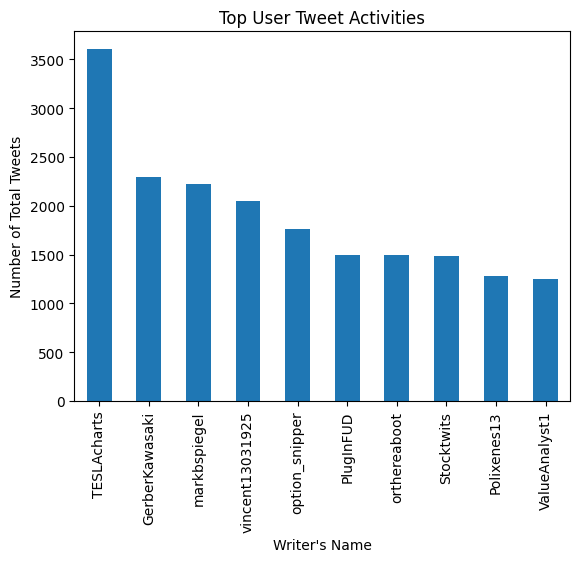

In [45]:

counts = filterTweets["writer"].value_counts(ascending= False)
countsFilter = counts[:10]
countsFilter.plot(kind="bar")

plt.title("Top User Tweet Activities")
plt.ylabel("Number of Total Tweets")
plt.xlabel("Writer's Name")
plt.show()

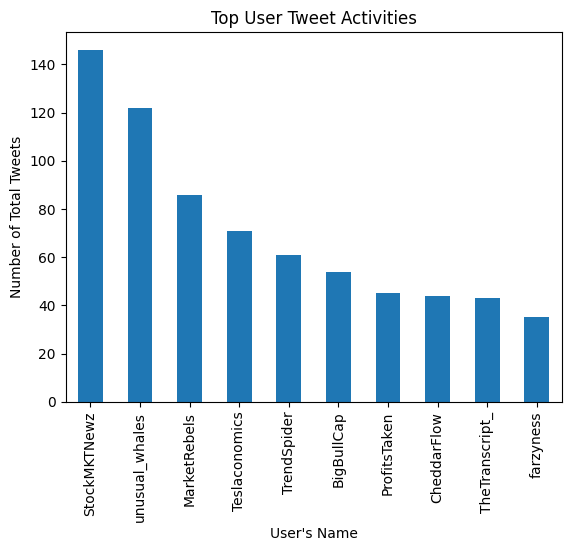

In [46]:
counts = crawled_tweets["writer"].value_counts(ascending= False)
countsFilter = counts[:10]
countsFilter.plot(kind="bar")

plt.title("Top User Tweet Activities")
plt.ylabel("Number of Total Tweets")
plt.xlabel("User's Name")
plt.show()

Graph above shows active users/writers

<AxesSubplot: ylabel='ticker_symbol'>

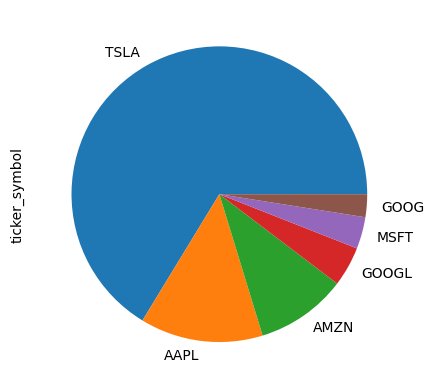

In [47]:
counts = filterTweets["ticker_symbol"].value_counts()
counts.plot(kind="pie")

<AxesSubplot: ylabel='ticker_symbol'>

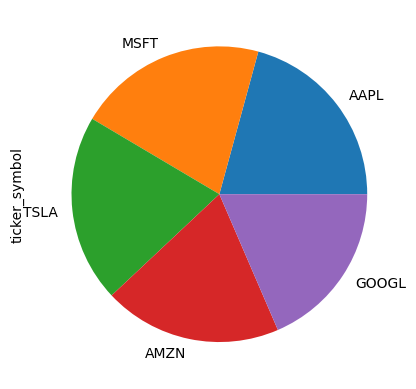

In [48]:
counts = crawled_tweets["ticker_symbol"].value_counts()
counts.plot(kind="pie")

Notice that there are more TSLA tweets in the dataset.

### Active Tweets dates

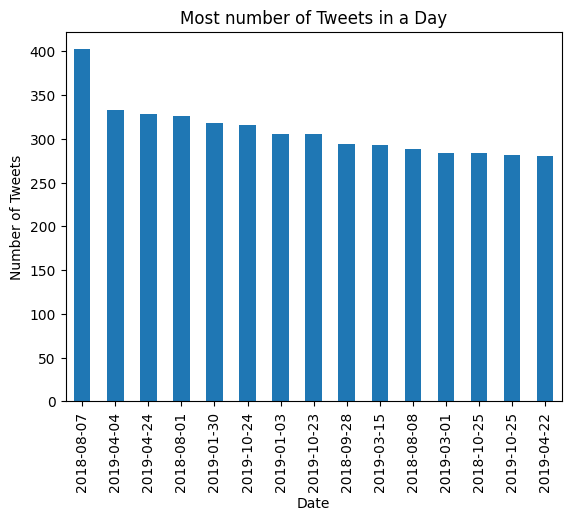

In [49]:
count = filterTweets["post_date"].value_counts(ascending = False)
count
filterCounts = count[:15]
filterCounts.plot(kind = "bar")
plt.title("Most number of Tweets in a Day")
plt.ylabel("Number of Tweets")
plt.xlabel("Date")
plt.show()

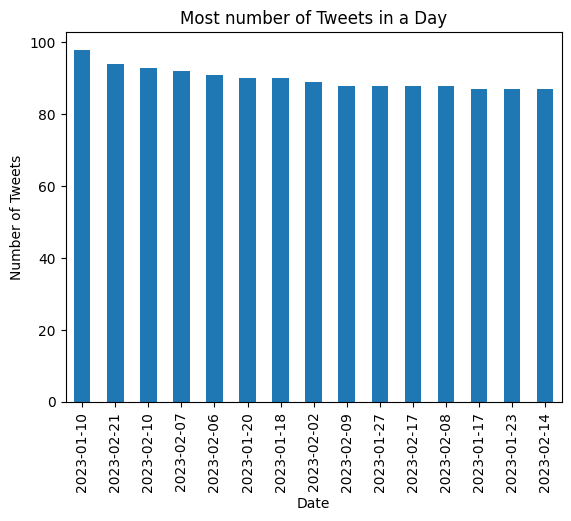

In [50]:
count = crawled_tweets["post_date"].value_counts(ascending = False)
count
filterCounts = count[:15]
filterCounts.plot(kind = "bar")
plt.title("Most number of Tweets in a Day")
plt.ylabel("Number of Tweets")
plt.xlabel("Date")
plt.show()

Above bar graphs shows the highest tweets in the respective days

### Word Cloud of Tweets

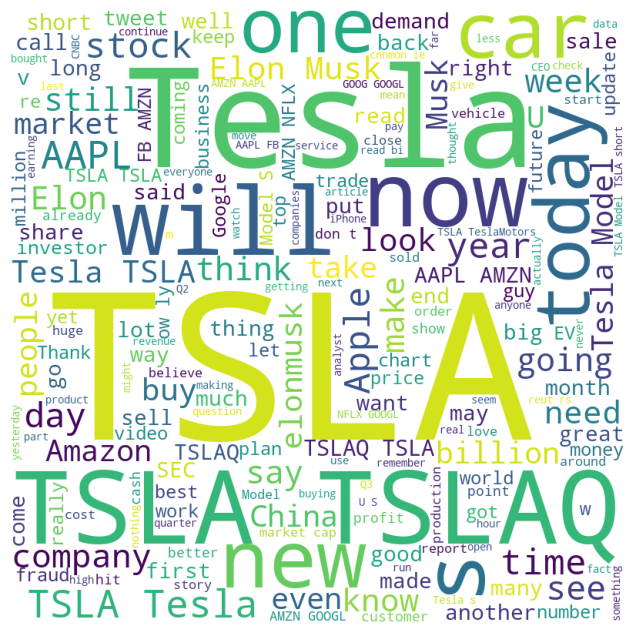

In [51]:
text = " ".join(filterTweets["body"])
wordcloud = WordCloud(width = 800, height = 800, background_color='white', max_words = 200)
wordcloud.generate(text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

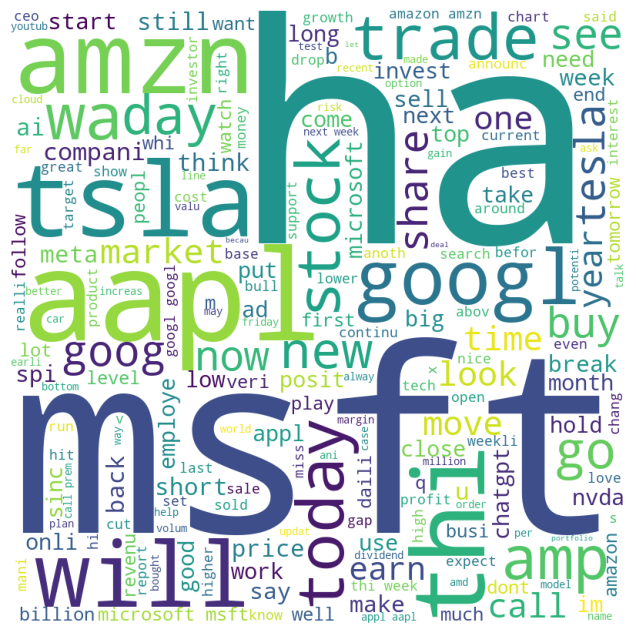

In [52]:
text = " ".join(crawled_tweets["clean_text"])
wordcloud = WordCloud(width = 800, height = 800, background_color='white', max_words = 200)
wordcloud.generate(text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

From the word cloud we can tell that tsla aapl msft are common tweets in Twitter

# Polarity Detection

### Subjectivity and Polarity Analysis using Textblob

In [53]:
# Function to use TextBlob (Sentimental Analysis [Objectivity & Polarity])

def add_sentiment_scores_blob(df, text_column, polarity_threshold = 0.0 , subjectivity_threshold = 0.5):
    # Compute polarity and subjectivity scores for each row in the specified text column
    scores = df[text_column].apply(lambda x: TextBlob(x).sentiment)
    
    # Add two new columns to the DataFrame for the polarity and subjectivity scores
    df['blob_polarity'] = scores.apply(lambda x: x.polarity)
    df['blob_subjectivity'] = scores.apply(lambda x: x.subjectivity)
    
    # Convert polarity score to class (positive, neutral, or negative) based on the specified threshold
    df['blob_polarity'] = df['blob_polarity'].apply(lambda x: 'Positive' if x > polarity_threshold else 'Negative' if x < -polarity_threshold else 'Neutral')
    
    # Convert subjectivity score to class (subjective or objective) based on the specified threshold
    df['blob_subjectivity'] = df['blob_subjectivity'].apply(lambda x: 'Subjective' if x > subjectivity_threshold else 'Objective')
    
    return df
    
    

In [54]:
add_sentiment_scores_blob(filterTweets,"body", 0.0, 0.5)
filterTweets.head()

C:\Users\eric2\AppData\Local\Temp\ipykernel_19632\2951990553.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['blob_polarity'] = scores.apply(lambda x: x.polarity)
C:\Users\eric2\AppData\Local\Temp\ipykernel_19632\2951990553.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['blob_subjectivity'] = scores.apply(lambda x: x.subjectivity)
C:\Users\eric2\AppData\Local\Temp\ipykernel_19632\2951990553.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,clean_text,blob_polarity,blob_subjectivity
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000,id just like to point out that right now right...,Positive,Objective
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,if a tesla save you a month on ga you own it f...,Positive,Objective
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla featur request threadfeel free to repli ...,Positive,Subjective
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,i sell book versu i sell whatev the fuck i wan...,Negative,Subjective
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442,i think is basic financi insan to buy anyth ex...,Negative,Objective


In [55]:
add_sentiment_scores_blob(filterTweetsLemma,"clean_text", 0.0, 0.5)
filterTweetsLemma.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,clean_text,blob_polarity,blob_subjectivity
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000,id just like to point out that right now right...,Positive,Objective
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,if a tesla save you a month on gas you own it ...,Positive,Objective
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla feature request threadfeel free to reply...,Positive,Subjective
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,i sell book versus i sell whatever the fuck i ...,Negative,Subjective
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442,i think is basically financially insane to buy...,Negative,Subjective


In [56]:
crawled_tweets_lemma = crawled_tweets.copy()


In [57]:
crawled_tweets = add_sentiment_scores_blob(crawled_tweets, "clean_text", 0.0 , 0.5)
crawled_tweets.head()

,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,retweet_num,tweet_activity,url_cnt,...,emo_cnt,word_count,clean_text,subjectivity,sentiment,moderator,clean_text_no_stem_user,clean_text_lemma,blob_polarity,blob_subjectivity
0,AAPL,2023-01-01,1.609677e+18,David_Tracey,Things are going to get very interesting but w...,27,1,2,30,2,...,0,11,thing are go to get veri interest but when my ...,0,0.0,NaN,Things going get interesting My Q1 forecast So...,thing are going to get very interesting but wh...,Neutral,Objective
1,AAPL,2023-01-01,1.609657e+18,ASTS_Investors,Happy New Year SpaceMob! \n\nLet's hope 2023 w...,64,0,3,67,1,...,2,21,happi new year spacemob ha hope will be the ye...,1,1.0,NaN,Happy New Year SpaceMob Lets hope 2023 year Bl...,happy new year spacemob ha hope will be the ye...,Positive,Objective
2,AAPL,2023-01-01,1.609652e+18,BigCheds,$AAPL Apple weekly chart - hammer candle with ...,104,9,5,118,1,...,0,10,aapl appl weekli chart hammer candl with sprin...,0,0.0,NaN,AAPL Apple weekly chart hammer candle spring J...,aapl apple weekly chart hammer candle with spr...,Neutral,Objective
3,AAPL,2023-01-01,1.609637e+18,ThetaWarrior,$AAPL Yearly -26.8% https://t.co/SewErQmOPE,80,10,10,100,1,...,0,4,aapl yearli,0,0.0,NaN,AAPL Yearly 268,aapl yearly,Neutral,Objective
4,AAPL,2023-01-01,1.609626e+18,TrendSpider,Looking for shorts into the new year? 📉\n\nThi...,28,4,4,36,1,...,1,23,look for short into the new year thi weekli tr...,1,1.0,NaN,Looking shorts new year This weekly triangle b...,looking for short into the new year this weekl...,Positive,Objective


In [58]:
crawled_tweets_lemma = add_sentiment_scores_blob(crawled_tweets_lemma, "clean_text_lemma", 0.0 , 0.5)
crawled_tweets_lemma.head()

,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,retweet_num,tweet_activity,url_cnt,...,emo_cnt,word_count,clean_text,subjectivity,sentiment,moderator,clean_text_no_stem_user,clean_text_lemma,blob_polarity,blob_subjectivity
0,AAPL,2023-01-01,1.609677e+18,David_Tracey,Things are going to get very interesting but w...,27,1,2,30,2,...,0,11,thing are go to get veri interest but when my ...,0,0.0,NaN,Things going get interesting My Q1 forecast So...,thing are going to get very interesting but wh...,Positive,Subjective
1,AAPL,2023-01-01,1.609657e+18,ASTS_Investors,Happy New Year SpaceMob! \n\nLet's hope 2023 w...,64,0,3,67,1,...,2,21,happi new year spacemob ha hope will be the ye...,1,1.0,NaN,Happy New Year SpaceMob Lets hope 2023 year Bl...,happy new year spacemob ha hope will be the ye...,Positive,Subjective
2,AAPL,2023-01-01,1.609652e+18,BigCheds,$AAPL Apple weekly chart - hammer candle with ...,104,9,5,118,1,...,0,10,aapl appl weekli chart hammer candl with sprin...,0,0.0,NaN,AAPL Apple weekly chart hammer candle spring J...,aapl apple weekly chart hammer candle with spr...,Neutral,Objective
3,AAPL,2023-01-01,1.609637e+18,ThetaWarrior,$AAPL Yearly -26.8% https://t.co/SewErQmOPE,80,10,10,100,1,...,0,4,aapl yearli,0,0.0,NaN,AAPL Yearly 268,aapl yearly,Neutral,Objective
4,AAPL,2023-01-01,1.609626e+18,TrendSpider,Looking for shorts into the new year? 📉\n\nThi...,28,4,4,36,1,...,1,23,look for short into the new year thi weekli tr...,1,1.0,NaN,Looking shorts new year This weekly triangle b...,looking for short into the new year this weekl...,Positive,Subjective


In [59]:
# Remove blob_polarity = 'Neutral'

filterTweets = filterTweets.loc[filterTweets['blob_polarity'] != 'Neutral']
filterTweetsLemma = filterTweetsLemma.loc[filterTweetsLemma['blob_polarity'] != 'Neutral']
crawled_tweets = crawled_tweets.loc[crawled_tweets['blob_polarity'] != 'Neutral']
crawled_tweets_lemma = crawled_tweets_lemma.loc[crawled_tweets_lemma['blob_polarity'] != 'Neutral']

In [60]:
filterTweets

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,clean_text,blob_polarity,blob_subjectivity
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000,id just like to point out that right now right...,Positive,Objective
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,if a tesla save you a month on ga you own it f...,Positive,Objective
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla featur request threadfeel free to repli ...,Positive,Subjective
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,i sell book versu i sell whatev the fuck i wan...,Negative,Subjective
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442,i think is basic financi insan to buy anyth ex...,Negative,Objective
...,...,...,...,...,...,...,...,...,...,...,...,...
1498789,1063826911946653696,AMZN,EliteOptions2,2018-11-17,"Good morning everyone, New charts will be post...",0,1,28,29,good morn everyon new chart will be post by pm...,Positive,Subjective
1497751,1063426530825699329,AAPL,appleinsider,2018-11-16,"#iPad USB-C, $AAPL price, #Apple poaching from...",0,8,27,35,usbc aapl price poach from s and more on the a...,Positive,Objective
1497794,1063437783036030978,AAPL,RedDogT3,2018-11-16,A big clue for tech and the action Today. Doe...,0,3,28,31,a big clue for tech and the action today doe n...,Negative,Objective
1485697,1059821581927698432,AAPL,Stocktwits,2018-11-06,"On May 1, Apple authorized a buyback worth $10...",0,13,30,43,on may appl author a buyback worth billion as ...,Positive,Objective


In [61]:
filterTweetsLemma

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,clean_text,blob_polarity,blob_subjectivity
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000,id just like to point out that right now right...,Positive,Objective
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,if a tesla save you a month on gas you own it ...,Positive,Objective
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla feature request threadfeel free to reply...,Positive,Subjective
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,i sell book versus i sell whatever the fuck i ...,Negative,Subjective
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442,i think is basically financially insane to buy...,Negative,Subjective
...,...,...,...,...,...,...,...,...,...,...,...,...
1498789,1063826911946653696,AMZN,EliteOptions2,2018-11-17,"Good morning everyone, New charts will be post...",0,1,28,29,good morning everyone new chart will be posted...,Positive,Subjective
1497751,1063426530825699329,AAPL,appleinsider,2018-11-16,"#iPad USB-C, $AAPL price, #Apple poaching from...",0,8,27,35,usbc aapl price poaching from s and more on th...,Positive,Objective
1497794,1063437783036030978,AAPL,RedDogT3,2018-11-16,A big clue for tech and the action Today. Doe...,0,3,28,31,a big clue for tech and the action today doe n...,Negative,Objective
1485697,1059821581927698432,AAPL,Stocktwits,2018-11-06,"On May 1, Apple authorized a buyback worth $10...",0,13,30,43,on may apple authorized a buyback worth billio...,Positive,Objective


### Convert Positive, Negative and Neutral to numeral labels and Subjectivity

In [62]:
sentiment_map = {"Negative" : 0,"Positive" : 1}
subjectivity_mapping = {"Subjective": 1, "Objective": 0}


In [63]:

# filterTweets = pd.get_dummies(filterTweets, columns = ["blob_polarity"])
filterTweets["blob_subjectivity"].replace(subjectivity_mapping, inplace = True)
filterTweets["blob_polarity"].replace(sentiment_map, inplace = True)
filterTweets.head()

C:\Users\eric2\AppData\Local\Temp\ipykernel_19632\3122217306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterTweets["blob_subjectivity"].replace(subjectivity_mapping, inplace = True)
C:\Users\eric2\AppData\Local\Temp\ipykernel_19632\3122217306.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterTweets["blob_polarity"].replace(sentiment_map, inplace = True)


,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,clean_text,blob_polarity,blob_subjectivity
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000,id just like to point out that right now right...,1,0
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,if a tesla save you a month on ga you own it f...,1,0
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla featur request threadfeel free to repli ...,1,1
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,i sell book versu i sell whatev the fuck i wan...,0,1
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442,i think is basic financi insan to buy anyth ex...,0,0


In [64]:

# filterTweetsLemma = pd.get_dummies(filterTweetsLemma , columns = ["blob_polarity"])
filterTweetsLemma["blob_polarity"].replace(sentiment_map, inplace = True)
filterTweetsLemma["blob_subjectivity"].replace(subjectivity_mapping, inplace = True)
filterTweetsLemma.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,clean_text,blob_polarity,blob_subjectivity
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000,id just like to point out that right now right...,1,0
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,if a tesla save you a month on gas you own it ...,1,0
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla feature request threadfeel free to reply...,1,1
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,i sell book versus i sell whatever the fuck i ...,0,1
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442,i think is basically financially insane to buy...,0,1


In [65]:

crawled_tweets = pd.get_dummies(crawled_tweets , columns = ["sentiment"])

crawled_tweets.head()

,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,retweet_num,tweet_activity,url_cnt,...,clean_text,subjectivity,moderator,clean_text_no_stem_user,clean_text_lemma,blob_polarity,blob_subjectivity,sentiment_-1.0,sentiment_0.0,sentiment_1.0
1,AAPL,2023-01-01,1.609657e+18,ASTS_Investors,Happy New Year SpaceMob! \n\nLet's hope 2023 w...,64,0,3,67,1,...,happi new year spacemob ha hope will be the ye...,1,NaN,Happy New Year SpaceMob Lets hope 2023 year Bl...,happy new year spacemob ha hope will be the ye...,Positive,Objective,0,0,1
4,AAPL,2023-01-01,1.609626e+18,TrendSpider,Looking for shorts into the new year? 📉\n\nThi...,28,4,4,36,1,...,look for short into the new year thi weekli tr...,1,NaN,Looking shorts new year This weekly triangle b...,looking for short into the new year this weekl...,Positive,Objective,0,0,1
5,AAPL,2023-01-01,1.609585e+18,lord_fed,Don’t really see what is holding $AAPL up @ 20...,149,36,13,198,0,...,dont realli see what is hold aapl up x pe coul...,1,NaN,Dont really see holding AAPL 20x PE Could see ...,dont really see what is holding aapl up x pe c...,Negative,Objective,1,0,0
6,AAPL,2023-01-01,1.609553e+18,Mr_Derivatives,$AAPL A lot of ppl might be surprised if I sai...,519,46,44,609,1,...,aapl a lot of ppl might be surpris if i said i...,1,NaN,AAPL A lot ppl might surprised I said 2023 App...,aapl a lot of ppl might be surprised if i said...,Positive,Subjective,0,0,1
8,AAPL,2023-01-01,1.609407e+18,The_AI_Investor,Apple iphone market share peaked in H1 2009 an...,66,2,4,72,1,...,appl iphon market share peak in h and then fal...,1,NaN,Apple iphone market share peaked H1 2009 falli...,apple iphone market share peaked in h and then...,Positive,Objective,0,0,1


In [66]:

crawled_tweets_lemma = pd.get_dummies(crawled_tweets_lemma , columns = ["sentiment"])


crawled_tweets_lemma.head()

,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,retweet_num,tweet_activity,url_cnt,...,clean_text,subjectivity,moderator,clean_text_no_stem_user,clean_text_lemma,blob_polarity,blob_subjectivity,sentiment_-1.0,sentiment_0.0,sentiment_1.0
0,AAPL,2023-01-01,1.609677e+18,David_Tracey,Things are going to get very interesting but w...,27,1,2,30,2,...,thing are go to get veri interest but when my ...,0,NaN,Things going get interesting My Q1 forecast So...,thing are going to get very interesting but wh...,Positive,Subjective,0,1,0
1,AAPL,2023-01-01,1.609657e+18,ASTS_Investors,Happy New Year SpaceMob! \n\nLet's hope 2023 w...,64,0,3,67,1,...,happi new year spacemob ha hope will be the ye...,1,NaN,Happy New Year SpaceMob Lets hope 2023 year Bl...,happy new year spacemob ha hope will be the ye...,Positive,Subjective,0,0,1
4,AAPL,2023-01-01,1.609626e+18,TrendSpider,Looking for shorts into the new year? 📉\n\nThi...,28,4,4,36,1,...,look for short into the new year thi weekli tr...,1,NaN,Looking shorts new year This weekly triangle b...,looking for short into the new year this weekl...,Positive,Subjective,0,0,1
5,AAPL,2023-01-01,1.609585e+18,lord_fed,Don’t really see what is holding $AAPL up @ 20...,149,36,13,198,0,...,dont realli see what is hold aapl up x pe coul...,1,NaN,Dont really see holding AAPL 20x PE Could see ...,dont really see what is holding aapl up x pe c...,Positive,Objective,1,0,0
6,AAPL,2023-01-01,1.609553e+18,Mr_Derivatives,$AAPL A lot of ppl might be surprised if I sai...,519,46,44,609,1,...,aapl a lot of ppl might be surpris if i said i...,1,NaN,AAPL A lot ppl might surprised I said 2023 App...,aapl a lot of ppl might be surprised if i said...,Positive,Subjective,0,0,1


In [67]:

# crawled_tweets = pd.get_dummies(crawled_tweets , columns = ["blob_polarity"])
crawled_tweets["blob_polarity"].replace(sentiment_map, inplace = True)
crawled_tweets["blob_subjectivity"].replace(subjectivity_mapping, inplace = True)
crawled_tweets.head()


,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,retweet_num,tweet_activity,url_cnt,...,clean_text,subjectivity,moderator,clean_text_no_stem_user,clean_text_lemma,blob_polarity,blob_subjectivity,sentiment_-1.0,sentiment_0.0,sentiment_1.0
1,AAPL,2023-01-01,1.609657e+18,ASTS_Investors,Happy New Year SpaceMob! \n\nLet's hope 2023 w...,64,0,3,67,1,...,happi new year spacemob ha hope will be the ye...,1,NaN,Happy New Year SpaceMob Lets hope 2023 year Bl...,happy new year spacemob ha hope will be the ye...,1,0,0,0,1
4,AAPL,2023-01-01,1.609626e+18,TrendSpider,Looking for shorts into the new year? 📉\n\nThi...,28,4,4,36,1,...,look for short into the new year thi weekli tr...,1,NaN,Looking shorts new year This weekly triangle b...,looking for short into the new year this weekl...,1,0,0,0,1
5,AAPL,2023-01-01,1.609585e+18,lord_fed,Don’t really see what is holding $AAPL up @ 20...,149,36,13,198,0,...,dont realli see what is hold aapl up x pe coul...,1,NaN,Dont really see holding AAPL 20x PE Could see ...,dont really see what is holding aapl up x pe c...,0,0,1,0,0
6,AAPL,2023-01-01,1.609553e+18,Mr_Derivatives,$AAPL A lot of ppl might be surprised if I sai...,519,46,44,609,1,...,aapl a lot of ppl might be surpris if i said i...,1,NaN,AAPL A lot ppl might surprised I said 2023 App...,aapl a lot of ppl might be surprised if i said...,1,1,0,0,1
8,AAPL,2023-01-01,1.609407e+18,The_AI_Investor,Apple iphone market share peaked in H1 2009 an...,66,2,4,72,1,...,appl iphon market share peak in h and then fal...,1,NaN,Apple iphone market share peaked H1 2009 falli...,apple iphone market share peaked in h and then...,1,0,0,0,1


In [68]:
# crawled_tweets_lemma = pd.get_dummies(crawled_tweets_lemma , columns = ["blob_polarity"])
crawled_tweets_lemma["blob_subjectivity"].replace(subjectivity_mapping, inplace = True)
crawled_tweets_lemma["blob_polarity"].replace(sentiment_map, inplace = True)
crawled_tweets_lemma.head()

,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,retweet_num,tweet_activity,url_cnt,...,clean_text,subjectivity,moderator,clean_text_no_stem_user,clean_text_lemma,blob_polarity,blob_subjectivity,sentiment_-1.0,sentiment_0.0,sentiment_1.0
0,AAPL,2023-01-01,1.609677e+18,David_Tracey,Things are going to get very interesting but w...,27,1,2,30,2,...,thing are go to get veri interest but when my ...,0,NaN,Things going get interesting My Q1 forecast So...,thing are going to get very interesting but wh...,1,1,0,1,0
1,AAPL,2023-01-01,1.609657e+18,ASTS_Investors,Happy New Year SpaceMob! \n\nLet's hope 2023 w...,64,0,3,67,1,...,happi new year spacemob ha hope will be the ye...,1,NaN,Happy New Year SpaceMob Lets hope 2023 year Bl...,happy new year spacemob ha hope will be the ye...,1,1,0,0,1
4,AAPL,2023-01-01,1.609626e+18,TrendSpider,Looking for shorts into the new year? 📉\n\nThi...,28,4,4,36,1,...,look for short into the new year thi weekli tr...,1,NaN,Looking shorts new year This weekly triangle b...,looking for short into the new year this weekl...,1,1,0,0,1
5,AAPL,2023-01-01,1.609585e+18,lord_fed,Don’t really see what is holding $AAPL up @ 20...,149,36,13,198,0,...,dont realli see what is hold aapl up x pe coul...,1,NaN,Dont really see holding AAPL 20x PE Could see ...,dont really see what is holding aapl up x pe c...,1,0,1,0,0
6,AAPL,2023-01-01,1.609553e+18,Mr_Derivatives,$AAPL A lot of ppl might be surprised if I sai...,519,46,44,609,1,...,aapl a lot of ppl might be surpris if i said i...,1,NaN,AAPL A lot ppl might surprised I said 2023 App...,aapl a lot of ppl might be surprised if i said...,1,1,0,0,1


### Splitting up data for Prediction using ensemble machine learning models For Blob Subjectivity and Polarity Analysis

In [69]:
X = filterTweets["clean_text"].values 
y = filterTweets[["blob_polarity"]].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [70]:
X_lemma = filterTweetsLemma["clean_text"].values 
y_lemma = filterTweetsLemma[["blob_polarity"]].values
X_train_lemma, X_test_lemma, y_train_lemma, y_test_lemma = train_test_split(
    X_lemma, y_lemma, test_size=0.20, random_state=0)

In [71]:
X_subj = filterTweets["clean_text"].values 
y_subj = filterTweets["blob_subjectivity"].values
X_train_subj, X_test_subj, y_train_subj, y_test_subj = train_test_split(
    X_subj, y_subj, test_size=0.20, random_state=0)

In [72]:
X_subj_lemma = filterTweetsLemma["clean_text"].values 
y_subj_lemma = filterTweetsLemma["blob_subjectivity"].values
X_train_subj_lemma, X_test_subj_lemma, y_train_subj_lemma, y_test_subj_lemma = train_test_split(
    X_subj_lemma, y_subj_lemma, test_size=0.20, random_state=0)

In [73]:
filterTweets["blob_subjectivity"].value_counts()

0    34032
1    25880
Name: blob_subjectivity, dtype: int64

In [74]:
filterTweets[["blob_polarity"]].value_counts()

blob_polarity
1                42536
0                17376
dtype: int64

### Evaluation Data -> Crawled and labelled data

In [75]:
#Evluation Data for Subjectivity
eval_data_x = crawled_tweets['clean_text'].values
eval_data_x_lemma = crawled_tweets_lemma['clean_text_lemma'].values
eval_data_y = crawled_tweets['blob_subjectivity'].values
eval_data_y_lemma = crawled_tweets_lemma['blob_subjectivity'].values


In [76]:
def metric_report(y_test,y_pred,time,no_record_x_test,y_eval, y_pred_eval,time_eval,no_record_x_eval):
    accuracy = accuracy_score(y_test,y_pred)
    fmeasure = f1_score(y_test,y_pred, average = "weighted", zero_division = 1)
    recall = recall_score(y_test, y_pred, average = "weighted",zero_division = 1)
    precision = precision_score(y_test, y_pred, average = "weighted",zero_division = 1)

    
    print(f"Model Metrics with testing data")
    print(f"The accuracy of the Model is {accuracy}")
    print(f"The F-Score of the Model is {fmeasure}")
    print(f"The Recall of the Model is {recall}")
    print(f"The precision of the Model is {precision}")
    print(f"The time taken for the Model prediction is {time} seconds")
    print(f"The number of records per second is {no_record_x_test//time}")
    print(f"================================================================")
    

    accuracy_eval = accuracy_score(y_eval,y_pred_eval)
    fmeasure_eval = f1_score(y_eval,y_pred_eval, average = "weighted", zero_division = 1)
    recall_eval = recall_score(y_eval, y_pred_eval, average = "weighted",zero_division = 1)
    precision_eval = precision_score(y_eval, y_pred_eval, average = "weighted",zero_division = 1)
    print(f"Model Metrics with evaluation data")
    print(f"The accuracy of the Model is {accuracy_eval}")
    print(f"The F-Score of the Model is {fmeasure_eval}")
    print(f"The Recall of the Model is {recall_eval}")
    print(f"The precision of the Model is {precision_eval}")
    print(f"The time taken for the Model prediction is {time_eval} seconds")
    print(f"The number of records per second is {no_record_x_eval//time_eval}")

In [77]:
def metric_report_noeval(y_test,y_pred,time,no_record_x_test):
    accuracy = accuracy_score(y_test,y_pred)
    fmeasure = f1_score(y_test,y_pred, average = "weighted", zero_division = 1)
    recall = recall_score(y_test, y_pred, average = "weighted",zero_division = 1)
    precision = precision_score(y_test, y_pred, average = "weighted",zero_division = 1)

    
    print(f"Model Metrics with testing data")
    print(f"The accuracy of the Model is {accuracy}")
    print(f"The F-Score of the Model is {fmeasure}")
    print(f"The Recall of the Model is {recall}")
    print(f"The precision of the Model is {precision}")
    print(f"The time taken for the Model prediction is {time} seconds")
    print(f"The number of records per second is {no_record_x_test//time}")
    print(f"================================================================")

### Vectorise and TFIDF train and test datas

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [79]:
# Create Count Vectorizer (TF)
vectoriser = CountVectorizer()

# For blob analysis dataset that have been stemmed

X_train_vec = vectoriser.fit_transform(X_train)
X_test_vec = vectoriser.transform(X_test)
eval_data_x_vec = vectoriser.transform(eval_data_x)


# For blob analysis dataset that have been lemmatised
X_train_lemma_vec = vectoriser.fit_transform(X_train_lemma)
X_test_lemma_vec = vectoriser.transform(X_test_lemma)
eval_data_x_lemma_vec = vectoriser.transform(eval_data_x_lemma)


# For Subjectivity Blob Analysis Vectorised
X_train_subj_vec = vectoriser.fit_transform(X_train_subj)
X_test_subj_vec = vectoriser.transform(X_test_subj)
eval_data_x_subj_vec = vectoriser.transform(eval_data_x)

X_train_subj_lemma_vec = vectoriser.fit_transform(X_train_subj_lemma)
X_test_subj_lemma_vec = vectoriser.transform(X_test_subj_lemma)
eval_data_x_subj_lemma_vec = vectoriser.transform(eval_data_x_lemma)


# Create TFID Vectorizer 
vectoriser_tfidf = TfidfVectorizer()
# For blob analysis dataset that have been stemmed


X_train_tfidf = vectoriser_tfidf.fit_transform(X_train)
X_test_tfidf = vectoriser_tfidf.transform(X_test)
eval_data_x_tfidf = vectoriser_tfidf.transform(eval_data_x)


# For blob analysis dataset  that have been lemmatised


X_train_lemma_tfidf = vectoriser_tfidf.fit_transform(X_train_lemma)
X_test_lemma_tfidf = vectoriser_tfidf.transform(X_test_lemma)
eval_data_x_lemma_tfidf = vectoriser_tfidf.transform(eval_data_x_lemma)



# For Subjectivity Blob Analysis TFIDF
X_train_subj_tfidf = vectoriser_tfidf.fit_transform(X_train_subj)
X_test_subj_tfidf = vectoriser_tfidf.transform(X_test_subj)
eval_data_x_subj_tfidf = vectoriser_tfidf.transform(eval_data_x)


X_train_subj_lemma_tfidf = vectoriser_tfidf.fit_transform(X_train_subj_lemma)
X_test_subj_lemma_tfidf = vectoriser_tfidf.transform(X_test_subj_lemma)
eval_data_x_subj_lemma_tfidf = vectoriser_tfidf.transform(eval_data_x_lemma)





## Doing up Machine Learning Models for TextBlob Analysis

## Subjectivity Prediction

In [80]:
def lr_clf(X_train, y_train, X_test, y_test,x_eval,y_eval):
    # Train the model using Naive Bayes algorithm
    clf = LogisticRegression(max_iter = 1000)
    test_size = len(y_test)
    clf.fit(X_train, y_train)
    # Make predictions on test data
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    
    metric_report(y_test,y_pred,time_taken,test_size, y_eval,y_pred_eval,time_taken_eval,len(y_eval))
    
    

In [281]:
# Decision Tree Classifier (subjectivity) for Stemmed Dataset and vectorised
lr_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj,eval_data_x_subj_vec,eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8850037553200367
The F-Score of the Model is 0.8846219753583259
The Recall of the Model is 0.8850037553200367
The precision of the Model is 0.8848767363288124
The time taken for the Model prediction is 0.0019960403442382812 seconds
The number of records per second is 6003385.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8287575616565844
The F-Score of the Model is 0.8383739762384446
The Recall of the Model is 0.8287575616565844
The precision of the Model is 0.8610608824839655
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 429799999.0


In [282]:
# Decision Tree Classifier (subjectivity) for lemmatised Dataset and vectorised
lr_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma,eval_data_x_subj_lemma_vec,eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.9274447949526814
The F-Score of the Model is 0.9273734996154687
The Recall of the Model is 0.9274447949526814
The precision of the Model is 0.927402870808471
The time taken for the Model prediction is 0.0019948482513427734 seconds
The number of records per second is 6038554.0
Model Metrics with evaluation data
The accuracy of the Model is 0.9257794322940903
The F-Score of the Model is 0.9262438928671701
The Recall of the Model is 0.9257794322940903
The precision of the Model is 0.9270342354842755
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 429799999.0


In [283]:
# Decision Tree Classifier (subjectivity) for stemmed Dataset and tfidf
lr_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj,eval_data_x_subj_tfidf,eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8720687640824502
The F-Score of the Model is 0.8711688520243754
The Recall of the Model is 0.8720687640824502
The precision of the Model is 0.8725957062155586
The time taken for the Model prediction is 0.0009953975677490234 seconds
The number of records per second is 12038405.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8396928804094927
The F-Score of the Model is 0.8468270448759343
The Recall of the Model is 0.8396928804094927
The precision of the Model is 0.8613705805321541
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 429799999.0


In [284]:
# Decision Tree Classifier (subjectivity) for lemmatised Dataset and tfidf
lr_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma,eval_data_x_subj_lemma_tfidf,eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8948198572140129
The F-Score of the Model is 0.8943231855211926
The Recall of the Model is 0.8948198572140129
The precision of the Model is 0.8954616405522648
The time taken for the Model prediction is 0.000997304916381836 seconds
The number of records per second is 12078552.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8976268031642625
The F-Score of the Model is 0.8974997726822954
The Recall of the Model is 0.8976268031642625
The precision of the Model is 0.8973841020315089
The time taken for the Model prediction is 0.0009970664978027344 seconds
The number of records per second is 4310645.0


### Naive Bayes ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [81]:
def multi_nb_clf(X_train, y_train, X_test, y_test,x_eval, y_eval):
    # Train the model using Naive Bayes algorithm
    clf = MultinomialNB()
    test_size = len(y_test)
    clf.fit(X_train, y_train)
    # Make predictions on test data
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,y_pred,time_taken,test_size,y_eval,y_pred_eval,time_taken_eval,len(y_eval))
    
    

In [286]:
# Naive Bayes for Stemmed Dataset and Vectorised
multi_nb_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj,eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.7817741800884587
The F-Score of the Model is 0.7806996856915873
The Recall of the Model is 0.7817741800884587
The precision of the Model is 0.7807451957427398
The time taken for the Model prediction is 0.003989219665527344 seconds
The number of records per second is 3003845.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7908329455560726
The F-Score of the Model is 0.7951300851710812
The Recall of the Model is 0.7908329455560726
The precision of the Model is 0.8005557285664411
The time taken for the Model prediction is 0.000995635986328125 seconds
The number of records per second is 4316838.0


In [287]:
# Naive Bayes for Lemmatised and Vectorised
multi_nb_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma,eval_data_x_subj_lemma_vec, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8098123858542254
The F-Score of the Model is 0.8092759569511868
The Recall of the Model is 0.8098123858542254
The precision of the Model is 0.809344930178282
The time taken for the Model prediction is 0.0019941329956054688 seconds
The number of records per second is 6040720.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8194509073987901
The F-Score of the Model is 0.8155344431345528
The Recall of the Model is 0.8194509073987901
The precision of the Model is 0.8141405768473916
The time taken for the Model prediction is 0.0009975433349609375 seconds
The number of records per second is 4308584.0


In [288]:
# Naive Bayes for stemmed crawled dataset and TFIDF
multi_nb_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj,eval_data_x_subj_tfidf,eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.7366268880914629
The F-Score of the Model is 0.711975889162396
The Recall of the Model is 0.7366268880914629
The precision of the Model is 0.778192354209336
The time taken for the Model prediction is 0.0019948482513427734 seconds
The number of records per second is 6006973.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8143322475570033
The F-Score of the Model is 0.7879970997554757
The Recall of the Model is 0.8143322475570033
The precision of the Model is 0.7911693300130419
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 429799999.0


In [289]:
# Naive Bayes for lemmatised crawled dataset and TFIDF
multi_nb_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma,eval_data_x_subj_lemma_tfidf,eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.7536941723393658
The F-Score of the Model is 0.7354112285746732
The Recall of the Model is 0.7536941723393658
The precision of the Model is 0.7942168016951966
The time taken for the Model prediction is 0.001994609832763672 seconds
The number of records per second is 6039276.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7910656119125175
The F-Score of the Model is 0.756822837613183
The Recall of the Model is 0.7910656119125175
The precision of the Model is 0.8001578287415947
The time taken for the Model prediction is 0.0009975433349609375 seconds
The number of records per second is 4308584.0


### Create Decision Tree ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [82]:
def dt_clf(X_train, y_train, X_test,y_test,x_eval, y_eval):
    clf = DecisionTreeClassifier()
    clf.fit(X_train,y_train)
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,y_pred,time_taken,len(y_test),y_eval,y_pred_eval,time_taken_eval,len(y_eval))

In [291]:
# Decision Tree Classifier (subjectivity) for Stemmed Dataset and vectorised
dt_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj, eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.7916214637402987
The F-Score of the Model is 0.7916675293107106
The Recall of the Model is 0.7916214637402987
The precision of the Model is 0.7917168150033963
The time taken for the Model prediction is 0.00797414779663086 seconds
The number of records per second is 1502731.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7926942764076315
The F-Score of the Model is 0.8046653504344505
The Recall of the Model is 0.7926942764076315
The precision of the Model is 0.8296419986663293
The time taken for the Model prediction is 0.0035016536712646484 seconds
The number of records per second is 1227420.0


In [292]:
# Decision Tree Classifier (subjectivity) for lemmatised Dataset and vectorised
dt_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma, eval_data_x_subj_lemma_vec, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8167856549892081
The F-Score of the Model is 0.8167043364171559
The Recall of the Model is 0.8167856549892081
The precision of the Model is 0.8166421295760722
The time taken for the Model prediction is 0.007977724075317383 seconds
The number of records per second is 1509954.0
Model Metrics with evaluation data
The accuracy of the Model is 0.855746859004188
The F-Score of the Model is 0.856891363101891
The Recall of the Model is 0.855746859004188
The precision of the Model is 0.8585104352550736
The time taken for the Model prediction is 0.0029909610748291016 seconds
The number of records per second is 1436996.0


In [293]:
# Decision Tree Classifier (subjectivity) for stemmed Dataset and tfidf
dt_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj,eval_data_x_subj_tfidf, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.7737628306767921
The F-Score of the Model is 0.774045682084352
The Recall of the Model is 0.7737628306767921
The precision of the Model is 0.7744391976958611
The time taken for the Model prediction is 0.010965585708618164 seconds
The number of records per second is 1092782.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7782689623080502
The F-Score of the Model is 0.7923862511438132
The Recall of the Model is 0.7782689623080502
The precision of the Model is 0.8231416564489076
The time taken for the Model prediction is 0.003989219665527344 seconds
The number of records per second is 1077403.0


In [294]:
# Decision Tree Classifier (subjectivity) for lemmatised Dataset and tfidf
dt_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma, eval_data_x_subj_lemma_tfidf, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8052465548729869
The F-Score of the Model is 0.8053720401682528
The Recall of the Model is 0.8052465548729869
The precision of the Model is 0.8055432710365302
The time taken for the Model prediction is 0.013965129852294922 seconds
The number of records per second is 862577.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8417868776174965
The F-Score of the Model is 0.8434194372048133
The Recall of the Model is 0.8417868776174965
The precision of the Model is 0.8458574858830078
The time taken for the Model prediction is 0.00549626350402832 seconds
The number of records per second is 781985.0


### Random Forest ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [83]:
def rf_clf(X_train, y_train, X_test, y_test, x_eval, y_eval):
    
    clf = RandomForestClassifier()
    clf.fit(X_train,y_train)
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,y_pred,time_taken,len(y_test),y_eval,y_pred_eval,time_taken_eval,len(y_eval))


In [296]:
# Random Forest Classifier (subjectivity) for Stemmed Dataset and vectorised
rf_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj, eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8376867228573813
The F-Score of the Model is 0.8349248236520284
The Recall of the Model is 0.8376867228573813
The precision of the Model is 0.8413782782010283
The time taken for the Model prediction is 0.8279054164886475 seconds
The number of records per second is 14473.0
Model Metrics with evaluation data
The accuracy of the Model is 0.845742205677059
The F-Score of the Model is 0.847440913781029
The Recall of the Model is 0.845742205677059
The precision of the Model is 0.8494950443392917
The time taken for the Model prediction is 0.32474422454833984 seconds
The number of records per second is 13235.0


In [297]:
# Random Forest Classifier (subjectivity) for lemmatised Dataset and vectorised
rf_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma,eval_data_x_subj_lemma_vec, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8576290884941059
The F-Score of the Model is 0.8557422820334304
The Recall of the Model is 0.8576290884941059
The precision of the Model is 0.8619007162596
The time taken for the Model prediction is 0.8558640480041504 seconds
The number of records per second is 14074.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8652861796184271
The F-Score of the Model is 0.8624685890837527
The Recall of the Model is 0.8652861796184271
The precision of the Model is 0.8622477822722399
The time taken for the Model prediction is 0.339402437210083 seconds
The number of records per second is 12663.0


In [298]:
# Random Forest Classifier (subjectivity) for Stemmed Dataset and tfidf
rf_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj, eval_data_x_subj_tfidf, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8326796294750897
The F-Score of the Model is 0.8296876523468956
The Recall of the Model is 0.8326796294750897
The precision of the Model is 0.8365696080434959
The time taken for the Model prediction is 0.7961015701293945 seconds
The number of records per second is 15052.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8373662168450442
The F-Score of the Model is 0.838915669821558
The Recall of the Model is 0.8373662168450442
The precision of the Model is 0.8407226252869284
The time taken for the Model prediction is 0.36408567428588867 seconds
The number of records per second is 11804.0


In [299]:
# Random Forest Classifier (subjectivity) for lemmatised Dataset and tfidf
rf_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma, eval_data_x_subj_lemma_tfidf,eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8527311970778682
The F-Score of the Model is 0.8505643095925056
The Recall of the Model is 0.8527311970778682
The precision of the Model is 0.8577411112014971
The time taken for the Model prediction is 0.793339729309082 seconds
The number of records per second is 15183.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8678455095393206
The F-Score of the Model is 0.8638659787045254
The Recall of the Model is 0.8678455095393206
The precision of the Model is 0.8649827116436253
The time taken for the Model prediction is 0.35658931732177734 seconds
The number of records per second is 12053.0


### Ensemble Learning

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [84]:
def ensemble_clf(X_train, y_train, X_test, y_test, x_eval, y_eval):
    clf1 = DecisionTreeClassifier()
    clf2 = RandomForestClassifier()
    clf3 = SVC()

    # Create the ensemble classifier
    ensemble = VotingClassifier(estimators=[('dt', clf1), ('rf', clf2), ('svc', clf3)], voting='hard')
    
    # Train the ensemble classifier
    ensemble.fit(X_train,y_train)
    start_time = time.time()
    # Make predictions on the test set
    y_pred = ensemble.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = ensemble.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,y_pred,time_taken,len(y_test),y_eval,y_pred_eval,time_taken_eval,len(y_eval))

In [301]:
# Ensemble Classifier (subjectivity) for stemmed Dataset and vectorised
ensemble_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj, eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8603855461904365
The F-Score of the Model is 0.858971430742489
The Recall of the Model is 0.8603855461904365
The precision of the Model is 0.8617472699563492
The time taken for the Model prediction is 81.26764154434204 seconds
The number of records per second is 147.0
Model Metrics with evaluation data
The accuracy of the Model is 0.854118194509074
The F-Score of the Model is 0.8577420193333871
The Recall of the Model is 0.854118194509074
The precision of the Model is 0.8633933425390525
The time taken for the Model prediction is 25.5665500164032 seconds
The number of records per second is 168.0


In [302]:
# Ensemble Classifier (subjectivity) for lemmatised Dataset and vectorised
ensemble_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma, eval_data_x_subj_lemma_vec, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8784658807903039
The F-Score of the Model is 0.8776545842943272
The Recall of the Model is 0.8784658807903039
The precision of the Model is 0.8796809993512502
The time taken for the Model prediction is 77.36398673057556 seconds
The number of records per second is 155.0
Model Metrics with evaluation data
The accuracy of the Model is 0.9025127966496045
The F-Score of the Model is 0.9008295636002731
The Recall of the Model is 0.9025127966496045
The precision of the Model is 0.9010958671098859
The time taken for the Model prediction is 25.306406259536743 seconds
The number of records per second is 169.0


In [303]:
# Ensemble Classifier (subjectivity) for stemmed Dataset and tfidf
ensemble_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj, eval_data_x_subj_tfidf, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8657264457982141
The F-Score of the Model is 0.8644428404598795
The Recall of the Model is 0.8657264457982141
The precision of the Model is 0.8669991543524692
The time taken for the Model prediction is 76.51659893989563 seconds
The number of records per second is 156.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8515588645881805
The F-Score of the Model is 0.8552702537762543
The Recall of the Model is 0.8515588645881805
The precision of the Model is 0.8610249001244461
The time taken for the Model prediction is 25.4493350982666 seconds
The number of records per second is 168.0


In [304]:
# Ensemble Classifier (subjectivity) for lemmatised Dataset and tfidf

ensemble_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma, eval_data_x_subj_lemma_tfidf, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8863523161215341
The F-Score of the Model is 0.8856469868838874
The Recall of the Model is 0.8863523161215341
The precision of the Model is 0.8874867237380021
The time taken for the Model prediction is 78.29622316360474 seconds
The number of records per second is 153.0
Model Metrics with evaluation data
The accuracy of the Model is 0.9011167985109353
The F-Score of the Model is 0.8993204442912803
The Recall of the Model is 0.9011167985109353
The precision of the Model is 0.8996631784669712
The time taken for the Model prediction is 25.35926842689514 seconds
The number of records per second is 169.0


### Support Vector Machine Model

In [85]:
def svm_clf(X_train,y_train,X_test, y_test, x_eval , y_eval):
    
    clf = SVC(kernel = "rbf", random_state = 1)
    clf.fit(X_train,y_train)
    start_time = time.time()
    svm_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    svm_pred = (svm_pred >= 0.5).astype(int)
    y_pred_eval = (y_pred_eval >= 0.5).astype(int)
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,svm_pred,time_taken,len(y_test),y_eval,y_pred_eval,time_taken_eval,len(y_eval))

In [306]:
# SVM Classifier (subjectivity) for stemmed Dataset and vectorised

svm_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj, eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8634732537761829
The F-Score of the Model is 0.8623614710391333
The Recall of the Model is 0.8634732537761829
The precision of the Model is 0.8641901232671322
The time taken for the Model prediction is 75.67540669441223 seconds
The number of records per second is 158.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8375988832014891
The F-Score of the Model is 0.844847070449235
The Recall of the Model is 0.8375988832014891
The precision of the Model is 0.8595209298515325
The time taken for the Model prediction is 24.618167877197266 seconds
The number of records per second is 174.0


In [307]:
# SVM Classifier (subjectivity) for lemmatised Dataset and vectorised
svm_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma, eval_data_x_subj_lemma_vec, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8808733189440479
The F-Score of the Model is 0.8802612091842614
The Recall of the Model is 0.8808733189440479
The precision of the Model is 0.8815011928775861
The time taken for the Model prediction is 75.86583352088928 seconds
The number of records per second is 158.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8850628199162401
The F-Score of the Model is 0.8852032154945183
The Recall of the Model is 0.8850628199162401
The precision of the Model is 0.8853546384544457
The time taken for the Model prediction is 24.567858457565308 seconds
The number of records per second is 174.0


In [308]:
# SVM Classifier (subjectivity) for stemmed Dataset and tfidf
svm_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj, eval_data_x_subj_tfidf, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8822498539597764
The F-Score of the Model is 0.8815309101745518
The Recall of the Model is 0.8822498539597764
The precision of the Model is 0.8826647612198506
The time taken for the Model prediction is 76.42490458488464 seconds
The number of records per second is 156.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8348068869241507
The F-Score of the Model is 0.8426772745004666
The Recall of the Model is 0.8348068869241507
The precision of the Model is 0.8592143330618072
The time taken for the Model prediction is 25.029098749160767 seconds
The number of records per second is 171.0


In [309]:
# SVM Classifier (subjectivity) for lemmatised Dataset and tfidf
svm_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma, eval_data_x_subj_lemma_tfidf, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.906026896895235
The F-Score of the Model is 0.9057233650803371
The Recall of the Model is 0.906026896895235
The precision of the Model is 0.9062842921639828
The time taken for the Model prediction is 76.37246179580688 seconds
The number of records per second is 157.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8994881340158213
The F-Score of the Model is 0.899755697716604
The Recall of the Model is 0.8994881340158213
The precision of the Model is 0.9000777127673012
The time taken for the Model prediction is 25.030421018600464 seconds
The number of records per second is 171.0


### Neural Network Model



In [86]:
def mlp_clf(X_train, y_train, X_test, y_test, x_eval, y_eval):
    clf = MLPClassifier(solver = "lbfgs", alpha = 1e-5, 
                    hidden_layer_sizes =(32,4), activation = 'relu', random_state=1, max_iter = 1000)
    
    clf.fit(X_train,y_train)
    start_time = time.time()
    nn_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    nn_pred = (nn_pred >= 0.5).astype(int)
    y_pred_eval = (y_pred_eval >= 0.5).astype(int)
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,nn_pred,time_taken,len(y_test),y_eval,y_pred_eval,time_taken_eval,len(y_eval))

In [311]:
# Multilayer Perceptron for Stemmed Dataset (subjectivity) and vectorised
mlp_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj, eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8693983142785613
The F-Score of the Model is 0.8692151051069673
The Recall of the Model is 0.8693983142785613
The precision of the Model is 0.8691580627933658
The time taken for the Model prediction is 0.01097249984741211 seconds
The number of records per second is 1092093.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7805956258724989
The F-Score of the Model is 0.7966727788937437
The Recall of the Model is 0.7805956258724989
The precision of the Model is 0.8389432875124504
The time taken for the Model prediction is 0.0029914379119873047 seconds
The number of records per second is 1436767.0


In [312]:
# Multilayer Perceptron for lemmatised Dataset (subjectivity) and vectorised
mlp_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma, eval_data_x_subj_lemma_vec, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.9199734351652
The F-Score of the Model is 0.9199097650952452
The Recall of the Model is 0.9199734351652
The precision of the Model is 0.9199128743722005
The time taken for the Model prediction is 0.010087251663208008 seconds
The number of records per second is 1194180.0
Model Metrics with evaluation data
The accuracy of the Model is 0.9076314564913913
The F-Score of the Model is 0.9089001563883288
The Recall of the Model is 0.9076314564913913
The precision of the Model is 0.9118313060591666
The time taken for the Model prediction is 0.002924680709838867 seconds
The number of records per second is 1469562.0


In [313]:
# Multilayer Perceptron for Stemmed Dataset (subjectivity) and tfidf
mlp_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj, eval_data_x_subj_tfidf, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8284236001001418
The F-Score of the Model is 0.8283641549233699
The Recall of the Model is 0.8284236001001418
The precision of the Model is 0.8283126264323325
The time taken for the Model prediction is 0.007010698318481445 seconds
The number of records per second is 1709244.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7429036761284318
The F-Score of the Model is 0.7617427578765501
The Recall of the Model is 0.7429036761284318
The precision of the Model is 0.8047235892164241
The time taken for the Model prediction is 0.0030176639556884766 seconds
The number of records per second is 1424280.0


c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [314]:
# Multilayer Perceptron for lemmatised Dataset (subjectivity) and tfidf
mlp_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma, eval_data_x_subj_lemma_tfidf, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.9281089158226797
The F-Score of the Model is 0.9280935692340903
The Recall of the Model is 0.9281089158226797
The precision of the Model is 0.9280834117744736
The time taken for the Model prediction is 0.007978677749633789 seconds
The number of records per second is 1509773.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8976268031642625
The F-Score of the Model is 0.8997572101987868
The Recall of the Model is 0.8976268031642625
The precision of the Model is 0.9060310737997719
The time taken for the Model prediction is 0.002696514129638672 seconds
The number of records per second is 1593909.0


### TensorFlow Subjectivity Machine Modeling

In [315]:
# Define the model architecture
model_vec2_subj = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_subj_vec.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_tfidf
model_vec2_subj.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_subj_vec2.h5", save_best_only=True)

# Train the model_tfidf
history_vec2_subj = model_vec2_subj.fit(X_train_subj_vec, y_train_subj, epochs=7, batch_size=16, validation_data=(X_test_subj_vec, y_test_subj), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_vec2_subj.load_weights("model_polarity_subj_vec2.h5")
test_loss, test_acc = model_vec2_subj.evaluate(X_test_subj_vec, y_test_subj)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_vec2_subj.predict(X_test_subj_vec)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time

start_time_eval = time.time()
y_pred_eval = model_vec2_subj.predict(eval_data_x_subj_vec)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report(y_test_subj, y_pred,time_taken,len(y_test_subj), eval_data_y, y_pred_eval, time_taken_eval, len(eval_data_y))

Epoch 1/7
2996/2996 [==============================] - 50s 16ms/step - loss: 0.5496 - accuracy: 0.7652 - val_loss: 0.4453 - val_accuracy: 0.8538
Epoch 2/7
2996/2996 [==============================] - 49s 16ms/step - loss: 0.4579 - accuracy: 0.8519 - val_loss: 0.4275 - val_accuracy: 0.8719
Epoch 3/7
2996/2996 [==============================] - 49s 16ms/step - loss: 0.4361 - accuracy: 0.8686 - val_loss: 0.4266 - val_accuracy: 0.8717
Epoch 4/7
2996/2996 [==============================] - 50s 17ms/step - loss: 0.4254 - accuracy: 0.8735 - val_loss: 0.4268 - val_accuracy: 0.8761
Epoch 5/7
2996/2996 [==============================] - 49s 16ms/step - loss: 0.4170 - accuracy: 0.8809 - val_loss: 0.4281 - val_accuracy: 0.8778
Epoch 6/7
2996/2996 [==============================] - 52s 17ms/step - loss: 0.4168 - accuracy: 0.8812 - val_loss: 0.4346 - val_accuracy: 0.8738
Epoch 7/7
375/375 [==============================] - 1s 3ms/step - loss: 0.4266 - accuracy: 0.8717
Test loss: 0.4266352355480194
T

In [316]:
# Define the model architecture
model_vec2_lemma_subj = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_subj_lemma_vec.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_vec
model_vec2_lemma_subj.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_subj_lemma_vec2.h5", save_best_only=True)

# Train the model_vec
history_vec2_subj_lemma = model_vec2_lemma_subj.fit(X_train_subj_lemma_vec, y_train_subj_lemma, epochs=10, batch_size=16, validation_data=(X_test_subj_lemma_vec, y_test_subj_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_vec on the test set
model_vec2_lemma_subj.load_weights("model_polarity_subj_lemma_vec2.h5")
test_loss, test_acc = model_vec2_lemma_subj.evaluate(X_test_subj_lemma_vec, y_test_subj_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)
start_time = time.time()
y_pred = model_vec2_lemma_subj.predict(X_test_subj_lemma_vec)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)
start_time_eval = time.time()
y_pred_eval = model_vec2_lemma_subj.predict(eval_data_x_subj_lemma_vec)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report(y_test_subj_lemma, y_pred,time_taken,len(y_test_subj_lemma), eval_data_y_lemma, y_pred_eval,time_taken_eval, len(eval_data_y_lemma))

Epoch 1/10
3012/3012 [==============================] - 65s 21ms/step - loss: 0.5166 - accuracy: 0.8018 - val_loss: 0.3887 - val_accuracy: 0.8894
Epoch 2/10
3012/3012 [==============================] - 64s 21ms/step - loss: 0.4050 - accuracy: 0.8888 - val_loss: 0.3704 - val_accuracy: 0.9018
Epoch 3/10
3012/3012 [==============================] - 62s 20ms/step - loss: 0.3775 - accuracy: 0.9013 - val_loss: 0.3669 - val_accuracy: 0.9084
Epoch 4/10
3012/3012 [==============================] - 61s 20ms/step - loss: 0.3660 - accuracy: 0.9090 - val_loss: 0.3626 - val_accuracy: 0.9113
Epoch 5/10
3012/3012 [==============================] - 61s 20ms/step - loss: 0.3614 - accuracy: 0.9121 - val_loss: 0.3677 - val_accuracy: 0.9069
Epoch 6/10
3012/3012 [==============================] - 61s 20ms/step - loss: 0.3540 - accuracy: 0.9156 - val_loss: 0.3630 - val_accuracy: 0.9075
Epoch 7/10
3012/3012 [==============================] - 61s 20ms/step - loss: 0.3497 - accuracy: 0.9181 - val_loss: 0.3692 -

In [317]:

# Define the model architecture
model_tfidf_subj = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_subj_tfidf.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_tfidf_subj
model_tfidf_subj.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_subj_tfidf.h5", save_best_only=True)

# Train the model_tfidf_subj
history_subj_tfidf = model_tfidf_subj.fit(X_train_subj_tfidf, y_train_subj, epochs=10, batch_size=16, validation_data=(X_test_subj_tfidf, y_test_subj), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf_subj on the test set
model_tfidf_subj.load_weights("model_subj_tfidf.h5")
test_loss, test_acc = model_tfidf_subj.evaluate(X_test_subj_tfidf, y_test_subj)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()

y_pred = model_tfidf_subj.predict(X_test_subj_tfidf)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_tfidf_subj.predict(eval_data_x_subj_tfidf)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report(y_test_subj, y_pred,time_taken,len(y_test_subj), eval_data_y, y_pred_eval,time_taken_eval, len(eval_data_y))

Epoch 1/10
2996/2996 [==============================] - 53s 17ms/step - loss: 0.5315 - accuracy: 0.7703 - val_loss: 0.4172 - val_accuracy: 0.8625
Epoch 2/10
2996/2996 [==============================] - 53s 18ms/step - loss: 0.4319 - accuracy: 0.8625 - val_loss: 0.4016 - val_accuracy: 0.8752
Epoch 3/10
2996/2996 [==============================] - 52s 17ms/step - loss: 0.4074 - accuracy: 0.8792 - val_loss: 0.3989 - val_accuracy: 0.8815
Epoch 4/10
2996/2996 [==============================] - 50s 17ms/step - loss: 0.3989 - accuracy: 0.8843 - val_loss: 0.4094 - val_accuracy: 0.8781
Epoch 5/10
2996/2996 [==============================] - 51s 17ms/step - loss: 0.3931 - accuracy: 0.8893 - val_loss: 0.4091 - val_accuracy: 0.8784
Epoch 6/10
2996/2996 [==============================] - 51s 17ms/step - loss: 0.3925 - accuracy: 0.8908 - val_loss: 0.4156 - val_accuracy: 0.8783
Epoch 7/10
2996/2996 [==============================] - 50s 17ms/step - loss: 0.3891 - accuracy: 0.8919 - val_loss: 0.4117 -

In [318]:
# Define the model architecture
model_lemma_tfidf = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_subj_lemma_tfidf.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_lemma_tfidf
model_lemma_tfidf.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_subj_lemma_tfidf.h5", save_best_only=True)

# Train the model_lemma_tfidf
history_subj_lemma_tfidf = model_lemma_tfidf.fit(X_train_subj_lemma_tfidf, y_train_subj_lemma, epochs=10, batch_size=16, validation_data=(X_test_subj_lemma_tfidf, y_test_subj_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_lemma_tfidf on the test set
model_lemma_tfidf.load_weights("model_subj_lemma_tfidf.h5")
test_loss, test_acc = model_lemma_tfidf.evaluate(X_test_subj_lemma_tfidf, y_test_subj_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_lemma_tfidf.predict(X_test_subj_lemma_tfidf)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_lemma_tfidf.predict(eval_data_x_subj_lemma_tfidf)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report(y_test_subj_lemma, y_pred,time_taken,len(y_test_subj_lemma), eval_data_y_lemma, y_pred_eval,time_taken_eval, len(eval_data_y_lemma))

Epoch 1/10
3012/3012 [==============================] - 64s 21ms/step - loss: 0.4497 - accuracy: 0.8408 - val_loss: 0.3769 - val_accuracy: 0.8981
Epoch 2/10
3012/3012 [==============================] - 63s 21ms/step - loss: 0.3322 - accuracy: 0.9223 - val_loss: 0.3621 - val_accuracy: 0.9128
Epoch 3/10
3012/3012 [==============================] - 61s 20ms/step - loss: 0.2976 - accuracy: 0.9397 - val_loss: 0.3502 - val_accuracy: 0.9165
Epoch 4/10
3012/3012 [==============================] - 61s 20ms/step - loss: 0.2787 - accuracy: 0.9473 - val_loss: 0.3524 - val_accuracy: 0.9147
Epoch 5/10
3012/3012 [==============================] - 62s 20ms/step - loss: 0.2612 - accuracy: 0.9541 - val_loss: 0.3527 - val_accuracy: 0.9196
Epoch 6/10
3012/3012 [==============================] - 63s 21ms/step - loss: 0.2505 - accuracy: 0.9579 - val_loss: 0.3572 - val_accuracy: 0.9171
Epoch 7/10
3012/3012 [==============================] - 63s 21ms/step - loss: 0.2422 - accuracy: 0.9591 - val_loss: 0.3679 -

In [319]:
tokenizer = Tokenizer(num_words=2000000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_subj)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train_subj)
test_sequence = tokenizer.texts_to_sequences(X_test_subj)
valid_sequence = tokenizer.texts_to_sequences(eval_data_x)

pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)
pad_valid = pad_sequences(valid_sequence,T)

# Define the model architecture
model_subj_vec = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=10, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation="relu",kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_subj_vec
model_subj_vec.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_subj_vec.h5", save_best_only=True)

# Train the model_subj_vec
history_subj_vec = model_subj_vec.fit(pad_train, y_train_subj, epochs=7, batch_size=16, validation_data=(pad_test, y_test_subj), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_subj_vec on the test set
model_subj_vec.load_weights("model_subj_vec.h5")
test_loss, test_acc = model_subj_vec.evaluate(pad_test, y_test_subj)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_subj_vec.predict(pad_test)
end_time = time.time()
time_taken = end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_subj_vec.predict(pad_valid)
end_time_eval = time.time()
time_taken_eval = end_time_eval - start_time_eval
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
metric_report(y_test_subj,y_pred,time_taken,len(y_test_subj),eval_data_y, y_pred_eval, time_taken_eval, len(eval_data_y) )

Epoch 1/7
2996/2996 [==============================] - 149s 49ms/step - loss: 0.3977 - accuracy: 0.8234 - val_loss: 0.2905 - val_accuracy: 0.8825
Epoch 2/7
2996/2996 [==============================] - 140s 47ms/step - loss: 0.2435 - accuracy: 0.9096 - val_loss: 0.2992 - val_accuracy: 0.8774
Epoch 3/7
2996/2996 [==============================] - 138s 46ms/step - loss: 0.1635 - accuracy: 0.9417 - val_loss: 0.3914 - val_accuracy: 0.8611
Epoch 4/7
2996/2996 [==============================] - 137s 46ms/step - loss: 0.1070 - accuracy: 0.9659 - val_loss: 0.4152 - val_accuracy: 0.8662
Epoch 5/7
2996/2996 [==============================] - 138s 46ms/step - loss: 0.0723 - accuracy: 0.9784 - val_loss: 0.4783 - val_accuracy: 0.8662
Epoch 6/7
2996/2996 [==============================] - 138s 46ms/step - loss: 0.0471 - accuracy: 0.9863 - val_loss: 0.6459 - val_accuracy: 0.8531
Epoch 7/7
375/375 [==============================] - 4s 11ms/step - loss: 0.2905 - accuracy: 0.8825
Test loss: 0.29045388102

In [320]:
tokenizer = Tokenizer(num_words=2000000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_subj_lemma)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train_subj_lemma)
test_sequence = tokenizer.texts_to_sequences(X_test_subj_lemma)

pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)

# Define the model architecture
model_subj_lemma_vec = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=10, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_subj_lemma_vec
model_subj_lemma_vec.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_subj_lemma_vec.h5", save_best_only=True)

# Train the model_subj_lemma_vec
history_subj_lemma_vec = model_subj_lemma_vec.fit(pad_train, y_train_subj_lemma, epochs=10, batch_size=16, validation_data=(pad_test, y_test_subj_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_subj_lemma_vec on the test set
model_subj_lemma_vec.load_weights("model_subj_lemma_vec.h5")
test_loss, test_acc = model_subj_lemma_vec.evaluate(pad_test, y_test_subj_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_subj_lemma_vec.predict(pad_test)
end_time = time.time()
time_taken = end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_subj_vec.predict(pad_valid)
end_time_eval = time.time()
time_taken_eval = end_time_eval - start_time_eval
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
metric_report(y_test_subj_lemma,y_pred,time_taken,len(y_test_subj_lemma),eval_data_y_lemma,y_pred_eval, time_taken_eval, len(eval_data_y_lemma) )

Epoch 1/10
3012/3012 [==============================] - 160s 52ms/step - loss: 0.3489 - accuracy: 0.8446 - val_loss: 0.1949 - val_accuracy: 0.9162
Epoch 2/10
3012/3012 [==============================] - 152s 51ms/step - loss: 0.1428 - accuracy: 0.9514 - val_loss: 0.1820 - val_accuracy: 0.9334
Epoch 3/10
3012/3012 [==============================] - 153s 51ms/step - loss: 0.0756 - accuracy: 0.9759 - val_loss: 0.2717 - val_accuracy: 0.9263
Epoch 4/10
3012/3012 [==============================] - 151s 50ms/step - loss: 0.0462 - accuracy: 0.9868 - val_loss: 0.2970 - val_accuracy: 0.9261
Epoch 5/10
3012/3012 [==============================] - 152s 50ms/step - loss: 0.0315 - accuracy: 0.9922 - val_loss: 0.3778 - val_accuracy: 0.9193
Epoch 6/10
3012/3012 [==============================] - 154s 51ms/step - loss: 0.0229 - accuracy: 0.9944 - val_loss: 0.4821 - val_accuracy: 0.9189
Epoch 7/10
3012/3012 [==============================] - 154s 51ms/step - loss: 0.0184 - accuracy: 0.9961 - val_loss: 0

### Polarity Machine Learning Model

### Logistic Regression Model

In [87]:
filterSubjTweets = filterTweets.copy()
filterSubjTweets = filterSubjTweets.loc[filterSubjTweets['blob_subjectivity'] == 1]


filterSubjTweetsLemma = filterTweetsLemma.copy()
filterSubjTweetsLemma = filterSubjTweetsLemma.loc[filterSubjTweetsLemma['blob_subjectivity'] == 1]


In [88]:
filterSubjTweets.describe()

filterSubjTweetsLemma.describe()


,tweet_id,comment_num,retweet_num,like_num,tweet_activity,blob_polarity,blob_subjectivity
count,2.636400e+04,26364.000000,26364.000000,26364.000000,26364.000000,26364.000000,26364.0
mean,1.054347e+18,6.605143,15.264148,60.939690,82.808982,0.701866,1.0
std,1.276394e+17,12.182636,41.237991,77.726144,104.014589,0.457447,0.0
min,5.504536e+17,0.000000,0.000000,0.000000,26.000000,0.000000,1.0
25%,1.018873e+18,2.000000,3.000000,25.000000,34.000000,0.000000,1.0
50%,1.080923e+18,4.000000,7.000000,37.000000,49.000000,1.000000,1.0
75%,1.136438e+18,8.000000,15.000000,65.000000,87.000000,1.000000,1.0
max,1.212128e+18,563.000000,999.000000,999.000000,1602.000000,1.000000,1.0


In [89]:
X = filterSubjTweets["clean_text"].values 
y = filterSubjTweets["blob_polarity"].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [90]:
X_lemma = filterSubjTweetsLemma["clean_text"].values 
y_lemma = filterSubjTweetsLemma[["blob_polarity"]].values
X_train_lemma, X_test_lemma, y_train_lemma, y_test_lemma = train_test_split(
    X_lemma, y_lemma, test_size=0.20, random_state=0)

In [91]:
# Create Count Vectorizer (TF)
vectoriser = CountVectorizer()

# For blob analysis dataset that have been stemmed

X_train_vec = vectoriser.fit_transform(X_train)
X_test_vec = vectoriser.transform(X_test)
eval_data_x_vec = vectoriser.transform(eval_data_x)


# For blob analysis dataset that have been lemmatised
X_train_lemma_vec = vectoriser.fit_transform(X_train_lemma)
X_test_lemma_vec = vectoriser.transform(X_test_lemma)
eval_data_x_lemma_vec = vectoriser.transform(eval_data_x_lemma)


# Create TFID Vectorizer 
vectoriser_tfidf = TfidfVectorizer()
# For blob analysis dataset that have been stemmed

X_train_tfidf = vectoriser_tfidf.fit_transform(X_train)
X_test_tfidf = vectoriser_tfidf.transform(X_test)
eval_data_x_tfidf = vectoriser_tfidf.transform(eval_data_x)

# For blob analysis dataset  that have been lemmatised

X_train_lemma_tfidf = vectoriser_tfidf.fit_transform(X_train_lemma)
X_test_lemma_tfidf = vectoriser_tfidf.transform(X_test_lemma)
eval_data_x_lemma_tfidf = vectoriser_tfidf.transform(eval_data_x_lemma)






In [92]:
# eval_data_y_polarity = crawled_tweets[['sentiment_-1.0', 'sentiment_1.0']]
# eval_data_y_polarity_lemma = crawled_tweets_lemma[['sentiment_-1.0', 'sentiment_1.0']]

In [93]:
eval_data_y_polarity = crawled_tweets['blob_polarity']
eval_data_y_polarity_lemma = crawled_tweets_lemma['blob_polarity']

In [94]:

le = LabelEncoder()

In [97]:
# stemmed and vectorised dataset
lr_clf(X_train_vec,y_train,X_test_vec,y_test, eval_data_x_vec,eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.9097758887171561
The F-Score of the Model is 0.9087759709784553
The Recall of the Model is 0.9097758887171561
The precision of the Model is 0.9086500806098825
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 517599999.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8490196078431372
The F-Score of the Model is 0.8417514915517703
The Recall of the Model is 0.8490196078431372
The precision of the Model is 0.847007711347033
The time taken for the Model prediction is 0.0009970664978027344 seconds
The number of records per second is 2557502.0


In [98]:
# lemmatised and vectorised dataset
lr_clf(X_train_lemma_vec,y_train_lemma,X_test_lemma_vec,y_test_lemma, eval_data_x_lemma_vec, eval_data_y_polarity_lemma)

c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Metrics with testing data
The accuracy of the Model is 0.9228143371894557
The F-Score of the Model is 0.9222133810751294
The Recall of the Model is 0.9228143371894557
The precision of the Model is 0.9221071066861576
The time taken for the Model prediction is 0.0009980201721191406 seconds
The number of records per second is 5283460.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8859618717504333
The F-Score of the Model is 0.8830023037749427
The Recall of the Model is 0.8859618717504333
The precision of the Model is 0.8836360952650587
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 288499999.0


In [99]:
# stemmed and tfidf dataset
lr_clf(X_train_tfidf,y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8792503863987635
The F-Score of the Model is 0.8726976235267954
The Recall of the Model is 0.8792503863987635
The precision of the Model is 0.8814511426975322
The time taken for the Model prediction is 0.0010006427764892578 seconds
The number of records per second is 5172675.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7968627450980392
The F-Score of the Model is 0.7645641535894178
The Recall of the Model is 0.7968627450980392
The precision of the Model is 0.8155729847494554
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 254999999.0


In [100]:
# lemmatised and tfidf dataset
lr_clf(X_train_lemma_tfidf,y_train_lemma,X_test_lemma_tfidf,y_test_lemma, eval_data_x_lemma_tfidf,eval_data_y_polarity_lemma)

c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Metrics with testing data
The accuracy of the Model is 0.8852645552816234
The F-Score of the Model is 0.8791344074530834
The Recall of the Model is 0.8852645552816234
The precision of the Model is 0.8892293656624823
The time taken for the Model prediction is 0.000997781753540039 seconds
The number of records per second is 5284722.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8305025996533796
The F-Score of the Model is 0.8053495789265006
The Recall of the Model is 0.8305025996533796
The precision of the Model is 0.8489862835686351
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 288499999.0


### Naive Bayes ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [101]:
# Naive Bayes Classification for Stemmed and Vectorised Dataset
multi_nb_clf(X_train_vec, y_train,X_test_vec,y_test, eval_data_x_vec, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8400309119010819
The F-Score of the Model is 0.8335036756510024
The Recall of the Model is 0.8400309119010819
The precision of the Model is 0.8354518906567435
The time taken for the Model prediction is 0.001995086669921875 seconds
The number of records per second is 2594373.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7388235294117647
The F-Score of the Model is 0.6737618739509195
The Recall of the Model is 0.7388235294117647
The precision of the Model is 0.7437918987438107
The time taken for the Model prediction is 0.0010035037994384766 seconds
The number of records per second is 2541096.0


In [102]:
# Naive Bayes Classification for lemmatised and Vectorised Dataset
multi_nb_clf(X_train_lemma_vec, y_train_lemma,X_test_lemma_vec,y_test_lemma, eval_data_x_lemma_vec, eval_data_y_polarity_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8480940641001328
The F-Score of the Model is 0.8410025218024634
The Recall of the Model is 0.8480940641001328
The precision of the Model is 0.8457344875930308
The time taken for the Model prediction is 0.002992391586303711 seconds
The number of records per second is 1762135.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7771230502599653
The F-Score of the Model is 0.7291022505456484
The Recall of the Model is 0.7771230502599653
The precision of the Model is 0.7856013756969199
The time taken for the Model prediction is 0.000997304916381836 seconds
The number of records per second is 2892796.0


c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [103]:
# Naive Bayes Classification for Stemmed and tfidf Dataset
multi_nb_clf(X_train_tfidf, y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.7283616692426584
The F-Score of the Model is 0.6292017991512276
The Recall of the Model is 0.7283616692426584
The precision of the Model is 0.7903531261752185
The time taken for the Model prediction is 0.0009963512420654297 seconds
The number of records per second is 5194955.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7058823529411765
The F-Score of the Model is 0.5849819882690566
The Recall of the Model is 0.7058823529411765
The precision of the Model is 0.7924554437159479
The time taken for the Model prediction is 0.00099945068359375 seconds
The number of records per second is 2551401.0


In [104]:
# Naive Bayes Classification for lemmatised and tfidf Dataset
multi_nb_clf(X_train_lemma_tfidf, y_train_lemma,X_test_lemma_tfidf,y_test_lemma, eval_data_x_lemma_tfidf, eval_data_y_polarity_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.7234970604968709
The F-Score of the Model is 0.6257157249658559
The Recall of the Model is 0.7234970604968709
The precision of the Model is 0.7853537724403735
The time taken for the Model prediction is 0.001990795135498047 seconds
The number of records per second is 2648690.0
Model Metrics with evaluation data
The accuracy of the Model is 0.729636048526863
The F-Score of the Model is 0.6187104385331891
The Recall of the Model is 0.729636048526863
The precision of the Model is 0.80296145956617
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 288499999.0


c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Create Decision Tree ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [105]:
# stemmed and vectorised dataset
dt_clf(X_train_vec,y_train,X_test_vec,y_test, eval_data_x_vec, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8367465224111282
The F-Score of the Model is 0.8376788277900806
The Recall of the Model is 0.8367465224111282
The precision of the Model is 0.8388500646874623
The time taken for the Model prediction is 0.004992008209228516 seconds
The number of records per second is 1036857.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7380392156862745
The F-Score of the Model is 0.7144278504254857
The Recall of the Model is 0.7380392156862745
The precision of the Model is 0.7170073640315855
The time taken for the Model prediction is 0.002992868423461914 seconds
The number of records per second is 852025.0


In [106]:
# lemmatised and vectorised dataset
dt_clf(X_train_lemma_vec,y_train_lemma,X_test_lemma_vec,y_test_lemma, eval_data_x_lemma_vec, eval_data_y_polarity_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8587142044377015
The F-Score of the Model is 0.8581291774613085
The Recall of the Model is 0.8587142044377015
The precision of the Model is 0.8576739439476551
The time taken for the Model prediction is 0.004984617233276367 seconds
The number of records per second is 1057854.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7826689774696707
The F-Score of the Model is 0.7610673792631822
The Recall of the Model is 0.7826689774696707
The precision of the Model is 0.768375431941039
The time taken for the Model prediction is 0.0020270347595214844 seconds
The number of records per second is 1423261.0


In [107]:
# stemmed and tfidf dataset
dt_clf(X_train_tfidf,y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8239953632148377
The F-Score of the Model is 0.8254503316904407
The Recall of the Model is 0.8239953632148377
The precision of the Model is 0.8274093501220051
The time taken for the Model prediction is 0.00598454475402832 seconds
The number of records per second is 864894.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7337254901960785
The F-Score of the Model is 0.7159321025899208
The Recall of the Model is 0.7337254901960785
The precision of the Model is 0.7141216511195573
The time taken for the Model prediction is 0.0029921531677246094 seconds
The number of records per second is 852229.0


In [108]:
# lemmatised and tfidf dataset
dt_clf(X_train_lemma_tfidf,y_train_lemma,X_test_lemma_tfidf,y_test_lemma, eval_data_x_lemma_tfidf, eval_data_y_polarity_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8492319362791579
The F-Score of the Model is 0.8493582741235715
The Recall of the Model is 0.8492319362791579
The precision of the Model is 0.8494901213727283
The time taken for the Model prediction is 0.004986286163330078 seconds
The number of records per second is 1057500.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7892547660311958
The F-Score of the Model is 0.7721907007280017
The Recall of the Model is 0.7892547660311958
The precision of the Model is 0.7761511791282781
The time taken for the Model prediction is 0.003989219665527344 seconds
The number of records per second is 723199.0


### Random Forest ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [109]:
# stemmed and vectorised dataset
rf_clf(X_train_vec,y_train,X_test_vec,y_test, eval_data_x_vec, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8829211746522411
The F-Score of the Model is 0.876857277214149
The Recall of the Model is 0.8829211746522411
The precision of the Model is 0.885004387088798
The time taken for the Model prediction is 0.2798614501953125 seconds
The number of records per second is 18494.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7564705882352941
The F-Score of the Model is 0.7004640872994643
The Recall of the Model is 0.7564705882352941
The precision of the Model is 0.7770321892331435
The time taken for the Model prediction is 0.16070079803466797 seconds
The number of records per second is 15867.0


In [110]:
# lemmatised and vectorised dataset
rf_clf(X_train_lemma_vec,y_train_lemma,X_test_lemma_vec,y_test_lemma, eval_data_x_lemma_vec , eval_data_y_polarity_lemma)

C:\Users\eric2\AppData\Local\Temp\ipykernel_19632\2338359831.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


Model Metrics with testing data
The accuracy of the Model is 0.8765408685757633
The F-Score of the Model is 0.8692721859382372
The Recall of the Model is 0.8765408685757633
The precision of the Model is 0.8808719998196902
The time taken for the Model prediction is 0.30278897285461426 seconds
The number of records per second is 17414.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7972270363951474
The F-Score of the Model is 0.7551387028293158
The Recall of the Model is 0.7972270363951474
The precision of the Model is 0.8229442252336334
The time taken for the Model prediction is 0.17505121231079102 seconds
The number of records per second is 16480.0


In [111]:
# stemmed and tfidf dataset
rf_clf(X_train_tfidf,y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8693972179289027
The F-Score of the Model is 0.8607488362106006
The Recall of the Model is 0.8693972179289027
The precision of the Model is 0.8733119994843426
The time taken for the Model prediction is 0.2859160900115967 seconds
The number of records per second is 18103.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7521568627450981
The F-Score of the Model is 0.6888352779701932
The Recall of the Model is 0.7521568627450981
The precision of the Model is 0.7838409947612253
The time taken for the Model prediction is 0.14813446998596191 seconds
The number of records per second is 17214.0


In [112]:
# lemmatised and tfidf dataset
rf_clf(X_train_lemma_tfidf,y_train_lemma,X_test_lemma_tfidf,y_test_lemma, eval_data_x_lemma_tfidf, eval_data_y_polarity_lemma)

C:\Users\eric2\AppData\Local\Temp\ipykernel_19632\2338359831.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


Model Metrics with testing data
The accuracy of the Model is 0.8712307984069789
The F-Score of the Model is 0.8624789295531811
The Recall of the Model is 0.8712307984069789
The precision of the Model is 0.8776564141517763
The time taken for the Model prediction is 0.3087897300720215 seconds
The number of records per second is 17076.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7927209705372616
The F-Score of the Model is 0.7453757460151365
The Recall of the Model is 0.7927209705372616
The precision of the Model is 0.8272811478373937
The time taken for the Model prediction is 0.1865386962890625 seconds
The number of records per second is 15465.0


### Ensemble Learning

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [113]:
# stemmed and vectorised dataset
ensemble_clf(X_train_vec,y_train,X_test_vec,y_test, eval_data_x_vec, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8862055641421948
The F-Score of the Model is 0.881127455620487
The Recall of the Model is 0.8862055641421948
The precision of the Model is 0.887039544377066
The time taken for the Model prediction is 14.40610647201538 seconds
The number of records per second is 359.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7674509803921569
The F-Score of the Model is 0.7179882787063889
The Recall of the Model is 0.7674509803921569
The precision of the Model is 0.7909815755992153
The time taken for the Model prediction is 7.064809083938599 seconds
The number of records per second is 360.0


In [114]:
# lemmatised and vectorised dataset
ensemble_clf(X_train_lemma_vec,y_train_lemma,X_test_lemma_vec,y_test_lemma, eval_data_x_lemma_vec, eval_data_y_polarity_lemma)

c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Metrics with testing data
The accuracy of the Model is 0.8898160439977243
The F-Score of the Model is 0.8846392600939691
The Recall of the Model is 0.8898160439977243
The precision of the Model is 0.8925272303257213
The time taken for the Model prediction is 15.661426782608032 seconds
The number of records per second is 336.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8048526863084922
The F-Score of the Model is 0.7680199587983939
The Recall of the Model is 0.8048526863084922
The precision of the Model is 0.826733378774548
The time taken for the Model prediction is 8.341521501541138 seconds
The number of records per second is 345.0


In [115]:
# stemmed and tfidf dataset
ensemble_clf(X_train_tfidf,y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8889103554868625
The F-Score of the Model is 0.8838838502085921
The Recall of the Model is 0.8889103554868625
The precision of the Model is 0.8901854697817385
The time taken for the Model prediction is 14.485923767089844 seconds
The number of records per second is 357.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7686274509803922
The F-Score of the Model is 0.7202186296089877
The Recall of the Model is 0.7686274509803922
The precision of the Model is 0.7913583193714474
The time taken for the Model prediction is 7.264732837677002 seconds
The number of records per second is 351.0


In [116]:
# lemmatised and tfidf dataset
ensemble_clf(X_train_lemma_tfidf,y_train_lemma,X_test_lemma_tfidf,y_test_lemma, eval_data_x_lemma_tfidf, eval_data_y_polarity_lemma)

c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Metrics with testing data
The accuracy of the Model is 0.8936089512611417
The F-Score of the Model is 0.8888003611469986
The Recall of the Model is 0.8936089512611417
The precision of the Model is 0.8962858343862015
The time taken for the Model prediction is 15.10946798324585 seconds
The number of records per second is 348.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8162911611785095
The F-Score of the Model is 0.7832605218721234
The Recall of the Model is 0.8162911611785095
The precision of the Model is 0.8423627671101259
The time taken for the Model prediction is 8.378909826278687 seconds
The number of records per second is 344.0


### Support Vector Machine Model

In [117]:
# stemmed and vectorised dataset
svm_clf(X_train_vec,y_train,X_test_vec,y_test, eval_data_x_vec, eval_data_y_polarity)

In [ ]:
# lemmatised and vectorised dataset
svm_clf(X_train_lemma_vec,y_train_lemma,X_test_lemma_vec,y_test_lemma, eval_data_x_lemma_vec, eval_data_y_polarity_lemma.values)

Model Metrics with testing data
The accuracy of the Model is 0.8824198748340603
The F-Score of the Model is 0.8761562062156398
The Recall of the Model is 0.8824198748340603
The precision of the Model is 0.8859376056706543
The time taken for the Model prediction is 13.553431272506714 seconds
The number of records per second is 389.0
Model Metrics with evaluation data
The accuracy of the Model is 0.5560725919032108
The F-Score of the Model is 0.4654738238030411
The Recall of the Model is 0.5560725919032108
The precision of the Model is 0.7152181265982125
The time taken for the Model prediction is 9.977167844772339 seconds
The number of records per second is 430.0


In [ ]:
# stemmed and tfidf dataset
svm_clf(X_train_tfidf,y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8898763523956723
The F-Score of the Model is 0.8850132171775628
The Recall of the Model is 0.8898763523956723
The precision of the Model is 0.891020270192183
The time taken for the Model prediction is 13.308837175369263 seconds
The number of records per second is 388.0
Model Metrics with evaluation data
The accuracy of the Model is 0.5088413215449046
The F-Score of the Model is 0.42904072092465667
The Recall of the Model is 0.5088413215449046
The precision of the Model is 0.7262185287943964
The time taken for the Model prediction is 9.961488962173462 seconds
The number of records per second is 431.0


In [ ]:
# lemmatised and tfidf dataset
svm_clf(X_train_lemma_tfidf,y_train_lemma,X_test_lemma_tfidf,y_test_lemma, eval_data_x_lemma_tfidf,eval_data_y_polarity_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8977811492509008
The F-Score of the Model is 0.8938381402815854
The Recall of the Model is 0.8977811492509008
The precision of the Model is 0.8992490584830184
The time taken for the Model prediction is 15.112626075744629 seconds
The number of records per second is 348.0
Model Metrics with evaluation data
The accuracy of the Model is 0.5770125639832481
The F-Score of the Model is 0.4983348090603141
The Recall of the Model is 0.5770125639832481
The precision of the Model is 0.7421447171195571
The time taken for the Model prediction is 11.145793437957764 seconds
The number of records per second is 385.0


### Neural Network Model



In [ ]:
def mlp_clf_pol(X_train, y_train, X_test, y_test, x_eval, y_eval):
    clf = MLPClassifier(solver = "lbfgs", alpha = 1e-5, 
                    hidden_layer_sizes =(128,), activation = 'relu', random_state=1, max_iter = 1000)
    
    clf.fit(X_train,y_train)
    start_time = time.time()
    nn_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    start_time_eval = time.time()
    nn_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    
    nn_pred = (nn_pred >= 0.5).astype(int)
    nn_pred_eval = (nn_pred_eval >= 0.5).astype(int)
    
    metric_report(y_test,nn_pred,time_taken,len(y_test),y_eval, nn_pred_eval, time_taken_eval, len(y_eval))

In [ ]:
# stemmed and vectorised dataset
mlp_clf_pol(X_train_vec,y_train,X_test_vec,y_test, eval_data_x_vec, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8948995363214838
The F-Score of the Model is 0.8965450261312092
The Recall of the Model is 0.8968315301391035
The precision of the Model is 0.8963156196986894
The time taken for the Model prediction is 0.010973215103149414 seconds
The number of records per second is 471694.0
Model Metrics with evaluation data
The accuracy of the Model is 0.49348534201954397
The F-Score of the Model is 0.6149180111965585
The Recall of the Model is 0.8294117647058824
The precision of the Model is 0.4900261477465162
The time taken for the Model prediction is 0.009489774703979492 seconds
The number of records per second is 452908.0


In [ ]:
# lemmatised and vectorised dataset
mlp_clf_pol(X_train_lemma_vec,y_train_lemma,X_test_lemma_vec,y_test_lemma, eval_data_x_lemma_vec,eval_data_y_polarity_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.9108666793096909
The F-Score of the Model is 0.9113856374784272
The Recall of the Model is 0.9120045514887161
The precision of the Model is 0.9108464919938483
The time taken for the Model prediction is 0.011968851089477539 seconds
The number of records per second is 440560.0
Model Metrics with evaluation data
The accuracy of the Model is 0.5858538855281527
The F-Score of the Model is 0.6987317405680806
The Recall of the Model is 0.872790294627383
The precision of the Model is 0.5830471214640249
The time taken for the Model prediction is 0.0069811344146728516 seconds
The number of records per second is 615659.0


In [ ]:
# stemmed and tfidf dataset
mlp_clf_pol(X_train_tfidf,y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8871715610510046
The F-Score of the Model is 0.8878606647747275
The Recall of the Model is 0.8873647604327666
The precision of the Model is 0.8883785994932568
The time taken for the Model prediction is 0.009953022003173828 seconds
The number of records per second is 520043.0
Model Metrics with evaluation data
The accuracy of the Model is 0.4827826896230805
The F-Score of the Model is 0.6017930290635206
The Recall of the Model is 0.8145098039215686
The precision of the Model is 0.4784372611701546
The time taken for the Model prediction is 0.006984710693359375 seconds
The number of records per second is 615344.0


In [ ]:
# lemmatised and tfidf dataset
mlp_clf_pol(X_train_lemma_tfidf,y_train_lemma,X_test_lemma_tfidf,y_test_lemma,eval_data_x_lemma_tfidf, eval_data_y_polarity_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.9053669637777356
The F-Score of the Model is 0.906950137966589
The Recall of the Model is 0.9072634174094444
The precision of the Model is 0.907046158600282
The time taken for the Model prediction is 0.009977340698242188 seconds
The number of records per second is 528497.0
Model Metrics with evaluation data
The accuracy of the Model is 0.5853885528152629
The F-Score of the Model is 0.6940101560766456
The Recall of the Model is 0.8606585788561525
The precision of the Model is 0.582154335217831
The time taken for the Model prediction is 0.008522272109985352 seconds
The number of records per second is 504325.0


#### TensorFlow 

In [ ]:
loss = "binary_crossentropy"

In [ ]:
# Define the model architecture
model_vec2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_vec.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(32, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(32, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_tfidf
model_vec2.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_vec2.h5", save_best_only=True)

# Train the model_tfidf
history_vec2 = model_vec2.fit(X_train_vec, y_train, epochs=10, batch_size=16, validation_data=(X_test_vec, y_test), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_vec2.load_weights("model_polarity_vec2.h5")
test_loss, test_acc = model_vec2.evaluate(X_test_vec, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_vec2.predict(X_test_vec)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_vec2.predict(eval_data_x_vec)
end_time_eval = time.time()
time_taken_eval =  end_time_eval - start_time_eval
y_pred_eval = (y_pred_eval >= 0.5).astype(int)

metric_report(y_test,y_pred,time_taken,len(y_test), eval_data_y_polarity, y_pred_eval, time_taken_eval, len(eval_data_y_polarity))

Epoch 1/10
1294/1294 [==============================] - 16s 12ms/step - loss: 0.5320 - accuracy: 0.7593 - val_loss: 0.3919 - val_accuracy: 0.8684
Epoch 2/10
1294/1294 [==============================] - 15s 11ms/step - loss: 0.4011 - accuracy: 0.8692 - val_loss: 0.3528 - val_accuracy: 0.8879
Epoch 3/10
1294/1294 [==============================] - 14s 11ms/step - loss: 0.3341 - accuracy: 0.9049 - val_loss: 0.3378 - val_accuracy: 0.8951
Epoch 4/10
1294/1294 [==============================] - 14s 11ms/step - loss: 0.2968 - accuracy: 0.9197 - val_loss: 0.3409 - val_accuracy: 0.8991
Epoch 5/10
1294/1294 [==============================] - 14s 11ms/step - loss: 0.2832 - accuracy: 0.9281 - val_loss: 0.3449 - val_accuracy: 0.8993
Epoch 6/10
1294/1294 [==============================] - 14s 11ms/step - loss: 0.2756 - accuracy: 0.9325 - val_loss: 0.3481 - val_accuracy: 0.8999
Epoch 7/10
1294/1294 [==============================] - 15s 11ms/step - loss: 0.2594 - accuracy: 0.9379 - val_loss: 0.3449 -

In [ ]:
# Define the model architecture
model_lemma_vec2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_lemma_vec.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_tfidf
model_lemma_vec2.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_lemma_vec2.h5", save_best_only=True)

# Train the model_tfidf
history_lemma_vec2 = model_lemma_vec2.fit(X_train_lemma_vec, y_train_lemma, epochs=10, batch_size=16, validation_data=(X_test_lemma_vec, y_test_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_lemma_vec2.load_weights("model_polarity_lemma_vec2.h5")
test_loss, test_acc = model_lemma_vec2.evaluate(X_test_lemma_vec, y_test_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_lemma_vec2.predict(X_test_lemma_vec)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_lemma_vec2.predict(eval_data_x_lemma_vec)
end_time_eval = time.time()
time_taken_eval =  end_time_eval - start_time_eval
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
metric_report(y_test_lemma,y_pred,time_taken,len(y_test_lemma), eval_data_y_polarity_lemma, y_pred_eval, time_taken_eval, len(eval_data_y_polarity_lemma))

Epoch 1/10
1319/1319 [==============================] - 21s 15ms/step - loss: 0.5327 - accuracy: 0.7646 - val_loss: 0.3953 - val_accuracy: 0.8648
Epoch 2/10
1319/1319 [==============================] - 19s 15ms/step - loss: 0.3843 - accuracy: 0.8774 - val_loss: 0.3387 - val_accuracy: 0.9033
Epoch 3/10
1319/1319 [==============================] - 19s 15ms/step - loss: 0.3125 - accuracy: 0.9170 - val_loss: 0.3297 - val_accuracy: 0.9088
Epoch 4/10
1319/1319 [==============================] - 19s 15ms/step - loss: 0.2822 - accuracy: 0.9292 - val_loss: 0.3459 - val_accuracy: 0.9038
Epoch 5/10
1319/1319 [==============================] - 19s 15ms/step - loss: 0.2632 - accuracy: 0.9404 - val_loss: 0.3412 - val_accuracy: 0.9109
Epoch 6/10
1319/1319 [==============================] - 19s 15ms/step - loss: 0.2463 - accuracy: 0.9478 - val_loss: 0.3592 - val_accuracy: 0.9027
Epoch 7/10
1319/1319 [==============================] - 19s 15ms/step - loss: 0.2473 - accuracy: 0.9458 - val_loss: 0.3486 -

In [ ]:
# Define the model architecture
model_tfidf = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_tfidf.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(32, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_tfidf
model_tfidf.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_tfidf.h5", save_best_only=True)

# Train the model_tfidf
history_tfidf = model_tfidf.fit(X_train_tfidf, y_train, epochs=10, batch_size=16, validation_data=(X_test_tfidf, y_test), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_tfidf.load_weights("model_polarity_tfidf.h5")
test_loss, test_acc = model_tfidf.evaluate(X_test_tfidf, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_tfidf.predict(X_test_tfidf)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time

start_time_eval = time.time()
y_pred_eval = model_tfidf.predict(eval_data_x_tfidf)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval
metric_report(y_test,y_pred,time_taken,len(y_test), eval_data_y_polarity, y_pred_eval, time_taken_eval,len(eval_data_y_polarity))

Epoch 1/10
1294/1294 [==============================] - 14s 10ms/step - loss: 0.5162 - accuracy: 0.7781 - val_loss: 0.3948 - val_accuracy: 0.8715
Epoch 2/10
1294/1294 [==============================] - 13s 10ms/step - loss: 0.3856 - accuracy: 0.8820 - val_loss: 0.3726 - val_accuracy: 0.8881
Epoch 3/10
1294/1294 [==============================] - 13s 10ms/step - loss: 0.3312 - accuracy: 0.9088 - val_loss: 0.3645 - val_accuracy: 0.8910
Epoch 4/10
1294/1294 [==============================] - 13s 10ms/step - loss: 0.2957 - accuracy: 0.9245 - val_loss: 0.3945 - val_accuracy: 0.8974
Epoch 5/10
1294/1294 [==============================] - 13s 10ms/step - loss: 0.2804 - accuracy: 0.9336 - val_loss: 0.3807 - val_accuracy: 0.8887
Epoch 6/10
1294/1294 [==============================] - 17s 13ms/step - loss: 0.2630 - accuracy: 0.9411 - val_loss: 0.4145 - val_accuracy: 0.8953
Epoch 7/10
1294/1294 [==============================] - 16s 12ms/step - loss: 0.2649 - accuracy: 0.9388 - val_loss: 0.4076 -

In [ ]:
# Define the model architecture
model_lemma_tfidf = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_lemma_tfidf.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(32, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(32, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_lemma_tfidf
model_lemma_tfidf.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_lemma_tfidf.h5", save_best_only=True)

# Train the model_lemma_tfidf
history_lemma_tfidf = model_lemma_tfidf.fit(X_train_lemma_tfidf, y_train_lemma, epochs=10, batch_size=16, validation_data=(X_test_lemma_tfidf, y_test_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_lemma_tfidf on the test set
model_lemma_tfidf.load_weights("model_polarity_lemma_tfidf.h5")
test_loss, test_acc = model_lemma_tfidf.evaluate(X_test_lemma_tfidf, y_test_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_lemma_tfidf.predict(X_test_lemma_tfidf)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time

start_time_eval = time.time()
y_pred_eval = model_lemma_tfidf.predict(eval_data_x_lemma_tfidf)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report(y_test_lemma,y_pred,time_taken,len(y_test_lemma), eval_data_y_polarity_lemma, y_pred_eval, time_taken_eval, len(eval_data_y_polarity_lemma))

Epoch 1/10
1319/1319 [==============================] - 23s 17ms/step - loss: 0.5135 - accuracy: 0.7812 - val_loss: 0.4011 - val_accuracy: 0.8655
Epoch 2/10
1319/1319 [==============================] - 21s 16ms/step - loss: 0.3640 - accuracy: 0.8931 - val_loss: 0.3564 - val_accuracy: 0.9002
Epoch 3/10
1319/1319 [==============================] - 19s 14ms/step - loss: 0.2995 - accuracy: 0.9198 - val_loss: 0.3417 - val_accuracy: 0.9054
Epoch 4/10
1319/1319 [==============================] - 19s 14ms/step - loss: 0.2708 - accuracy: 0.9349 - val_loss: 0.3591 - val_accuracy: 0.9050
Epoch 5/10
1319/1319 [==============================] - 20s 15ms/step - loss: 0.2451 - accuracy: 0.9443 - val_loss: 0.3735 - val_accuracy: 0.9038
Epoch 6/10
1319/1319 [==============================] - 18s 13ms/step - loss: 0.2349 - accuracy: 0.9485 - val_loss: 0.3854 - val_accuracy: 0.9101
Epoch 7/10
1319/1319 [==============================] - 21s 16ms/step - loss: 0.2280 - accuracy: 0.9505 - val_loss: 0.3875 -

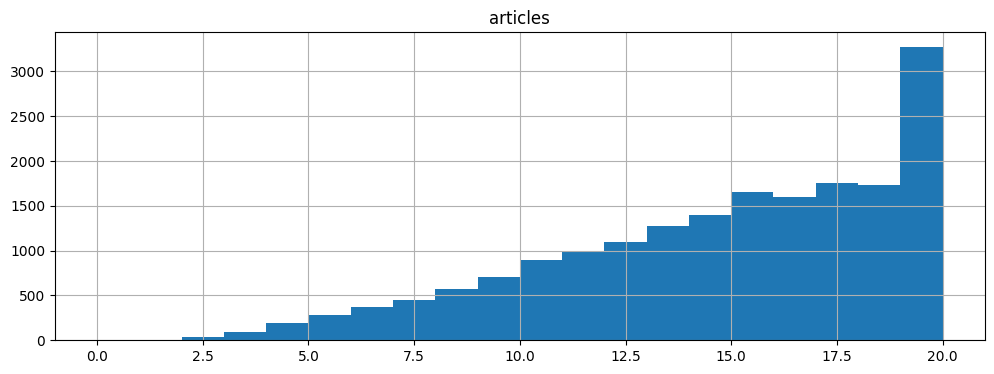

In [ ]:
tweet_word_count = [len(sentence.split()) for sentence in filterTweets.body]
tweet_word_count[:10]

# Analyze the distribution of sequences by looking at the length of the texts
pd.DataFrame({'articles': tweet_word_count}).hist(
    bins=20, figsize=(12, 4), range=[0, 20]
)
plt.show()

In [ ]:
tokenizer = Tokenizer(num_words=3000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequence = tokenizer.texts_to_sequences(X_test)
valid_sequence = tokenizer.texts_to_sequences(eval_data_x)

pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)
pad_valid = pad_sequences(valid_sequence, T)

# Define the model architecture
model_vec = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=10, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_vec
model_vec.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_vec.h5", save_best_only=True)

# Train the model_vec
history_subjectivity_tokenizer = model_vec.fit(pad_train, y_train, epochs=10, batch_size=16, validation_data=(pad_test, y_test), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_vec on the test set
model_vec.load_weights("model_polarity_vec.h5")
test_loss, test_acc = model_vec.evaluate(pad_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time_eval = time.time()
y_pred = model_vec.predict(pad_test)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time

start_time_eval = time.time()
y_pred_eval = model_vec.predict(pad_valid)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report( y_test,y_pred,time_taken,len( y_test), eval_data_y_polarity, y_pred_eval, time_taken_eval, len(eval_data_y_polarity))

Epoch 1/10
1294/1294 [==============================] - 93s 69ms/step - loss: 0.3632 - accuracy: 0.8472 - val_loss: 0.2364 - val_accuracy: 0.9024
Epoch 2/10
1294/1294 [==============================] - 86s 66ms/step - loss: 0.2127 - accuracy: 0.9208 - val_loss: 0.2265 - val_accuracy: 0.9162
Epoch 3/10
1294/1294 [==============================] - 88s 68ms/step - loss: 0.1711 - accuracy: 0.9391 - val_loss: 0.2173 - val_accuracy: 0.9158
Epoch 4/10
1294/1294 [==============================] - 84s 65ms/step - loss: 0.1325 - accuracy: 0.9545 - val_loss: 0.2513 - val_accuracy: 0.9113
Epoch 5/10
1294/1294 [==============================] - 88s 68ms/step - loss: 0.1001 - accuracy: 0.9667 - val_loss: 0.3058 - val_accuracy: 0.9057
Epoch 6/10
1294/1294 [==============================] - 84s 65ms/step - loss: 0.0717 - accuracy: 0.9789 - val_loss: 0.2923 - val_accuracy: 0.9104
Epoch 7/10
1294/1294 [==============================] - 85s 66ms/step - loss: 0.0547 - accuracy: 0.9836 - val_loss: 0.3896 -

In [ ]:
# Tokenise words by splittign them up.
tokenizer = Tokenizer(num_words=2500, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_lemma)
# Creates a dictionary of each word.
word_index = tokenizer.word_index
#Transforms each text into a sequence of interger from the word_index dictionary
train_sequences = tokenizer.texts_to_sequences(X_train_lemma)
test_sequences = tokenizer.texts_to_sequences(X_test_lemma)
valid_sequences = tokenizer.texts_to_sequences(eval_data_x)

# Pad the train sequence and make sure that the test sequence are of same length
pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequences,T)
pad_valid = pad_sequences(valid_sequences,T)

# Define the model_lemma_vec architecture
model_lemma_vec = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=10, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_lemma_vec
model_lemma_vec.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_lemma_vec.h5", save_best_only=True)

# Train the model_lemma_vec
history_subjectivity_tokenizer_lemma = model_lemma_vec.fit(pad_train, y_train_lemma, epochs=10, batch_size=16, validation_data=(pad_test, y_test_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_lemma_vec on the test set
model_lemma_vec.load_weights("model_polarity_lemma_vec.h5")
test_loss, test_acc = model_lemma_vec.evaluate(pad_test, y_test_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_lemma_vec.predict(pad_test)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time

start_time_eval = time.time()
y_pred_eval = model_lemma_vec.predict(pad_valid)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval
metric_report( y_test_lemma,y_pred,time_taken,len( y_test_lemma), eval_data_y_polarity_lemma, y_pred_eval, time_taken_eval, len(eval_data_y_polarity_lemma))

Epoch 1/10
1319/1319 [==============================] - 99s 73ms/step - loss: 0.3451 - accuracy: 0.8549 - val_loss: 0.2216 - val_accuracy: 0.9059
Epoch 2/10
1319/1319 [==============================] - 94s 71ms/step - loss: 0.1993 - accuracy: 0.9284 - val_loss: 0.2073 - val_accuracy: 0.9186
Epoch 3/10
1319/1319 [==============================] - 95s 72ms/step - loss: 0.1602 - accuracy: 0.9438 - val_loss: 0.2140 - val_accuracy: 0.9175
Epoch 4/10
1319/1319 [==============================] - 94s 72ms/step - loss: 0.1279 - accuracy: 0.9551 - val_loss: 0.2166 - val_accuracy: 0.9260
Epoch 5/10
1319/1319 [==============================] - 95s 72ms/step - loss: 0.0922 - accuracy: 0.9699 - val_loss: 0.2176 - val_accuracy: 0.9230
Epoch 6/10
1319/1319 [==============================] - 95s 72ms/step - loss: 0.0716 - accuracy: 0.9773 - val_loss: 0.2787 - val_accuracy: 0.9173
Epoch 7/10
1319/1319 [==============================] - 95s 72ms/step - loss: 0.0511 - accuracy: 0.9851 - val_loss: 0.2856 -

# Enhanced Classification for Sarcasm Detection Model

Importing a Kaggle Sarcasm Headlines dataset to train our model to detect sarcasm in tweets

In [ ]:
sarcasm_df = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines = True)

In [ ]:
sarcasm_df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [ ]:
datasetInfo(sarcasm_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB
 Dataset Information and type 
 None
--------------------------------------------------------

 Data Types: 
is_sarcastic     int64
headline        object
article_link    object
dtype: object
--------------------------------------------------------

 Rows and Columns: 
(28619, 3)
--------------------------------------------------------

 Column Names: 
Index(['is_sarcastic', 'headline', 'article_link'], dtype='object')
--------------------------------------------------------

 Null Values: 
is_sarcastic    0.0
headline        0.0
article_link    0.0
dtype: float64
--------------------------------------------------------

 

In [ ]:
sarcasm_df["is_sarcastic"].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

### Clean the Sarcasm Dataframe text

In [ ]:
clean_dataframe_text(sarcasm_df,"headline",False)

,is_sarcastic,headline,article_link
0,1,thirtysometh scientist unveil doomsday clock o...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep total nail whi congress is fall short ...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggi delici differ recip,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevent liar from get to work,https://local.theonion.com/inclement-weather-p...
4,1,mother come pretti close to use word stream co...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jew to celebr rosh hashasha or someth,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,intern affair investig disappoint conspiraci d...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beauti accept speech thi week came fr...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mar probe destroy by orbit spielbergg space palac,https://www.theonion.com/mars-probe-destroyed-...


In [ ]:
X_sarcasm = sarcasm_df["headline"].values 
y_sarcasm = sarcasm_df["is_sarcastic"].values
X_train_sarcasm, X_test_sarcasm, y_train_sarcasm, y_test_sarcasm = train_test_split(
    X_sarcasm, y_sarcasm, test_size=0.20, random_state=42)

In [ ]:
X_train_sarcasm.shape

(22895,)

In [ ]:
tokenizer = Tokenizer(num_words=2500, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_sarcasm)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train_sarcasm)
test_sequence = tokenizer.texts_to_sequences(X_test_sarcasm)

pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)

max_length = max(len(seq) for seq in train_sequences)

# Define the model architecture
model_sarcasm = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=max_length, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_sarcasm.summary()
# Compile the model_sarcasm
model_sarcasm.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_sarcasm.h5", save_best_only=True)

# Train the model_sarcasm
history_sarcasm = model_sarcasm.fit(pad_train, y_train_sarcasm, epochs=10, batch_size=32, validation_data=(pad_test, y_test_sarcasm), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_sarcasm on the test set
model_sarcasm.load_weights("model_sarcasm.h5")
test_loss, test_acc = model_sarcasm.evaluate(pad_test, y_test_sarcasm)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_sarcasm.predict(pad_test)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time
metric_report_noeval(y_test_sarcasm,y_pred,time_taken,len(y_test_sarcasm))

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 38, 100)           1768900   
                                                                 
 bidirectional_14 (Bidirecti  (None, 38, 128)          84480     
 onal)                                                           
                                                                 
 global_max_pooling1d_14 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dense_125 (Dense)           (None, 32)                4128      
                                                                 
 dropout_85 (Dropout)        (None, 32)                0         
                                                                 
 dense_126 (Dense)           (None, 1)               

In [ ]:
filterTweetsTemp = filterTweets.copy()

In [ ]:
X_train_temp = filterTweetsTemp['body']

In [ ]:
print(len(X_train_temp))

59912


In [ ]:
# Tokenise words by splittign them up.
tokenizer = Tokenizer(num_words=2500, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_temp)
# Creates a dictionary of each word.
word_index = tokenizer.word_index
#Transforms each text into a sequence of interger from the word_index dictionary
test_sequence_x = tokenizer.texts_to_sequences(X_train_temp)

# Pad the train sequence and make sure that the test sequence are of same length
pad_train_x = pad_sequences(test_sequence_x)


In [ ]:
sarcasm_pred = model_sarcasm.predict(pad_train_x)

1873/1873 [==============================] - 440s 234ms/step


In [ ]:
sarcasm_pred = (sarcasm_pred >= 0.5).astype(int)
print(sarcasm_pred)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [ ]:
len(sarcasm_pred)

59912

In [ ]:
filterTweetsTemp['is_sarcasm'] = sarcasm_pred

In [ ]:
filterTweetsTemp

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,clean_text,blob_subjectivity,blob_polarity_Negative,blob_polarity_Positive,is_sarcasm
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000,id just like to point out that right now right...,0,0,1,1
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,if a tesla save you a month on ga you own it f...,0,0,1,1
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla featur request threadfeel free to repli ...,1,0,1,1
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,i sell book versu i sell whatev the fuck i wan...,1,1,0,0
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442,i think is basic financi insan to buy anyth ex...,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498789,1063826911946653696,AMZN,EliteOptions2,2018-11-17,"Good morning everyone, New charts will be post...",0,1,28,29,good morn everyon new chart will be post by pm...,1,0,1,1
1497751,1063426530825699329,AAPL,appleinsider,2018-11-16,"#iPad USB-C, $AAPL price, #Apple poaching from...",0,8,27,35,usbc aapl price poach from s and more on the a...,0,0,1,1
1497794,1063437783036030978,AAPL,RedDogT3,2018-11-16,A big clue for tech and the action Today. Doe...,0,3,28,31,a big clue for tech and the action today doe n...,0,1,0,1
1485697,1059821581927698432,AAPL,Stocktwits,2018-11-06,"On May 1, Apple authorized a buyback worth $10...",0,13,30,43,on may appl author a buyback worth billion as ...,0,0,1,1


In [ ]:
x_sarcasm_polarity = filterTweetsTemp['body']
y_sarcasm_polarity = filterTweetsTemp[['blob_polarity_Negative','blob_polarity_Positive','blob_polarity_Positive']]

X_train_sp, y_train_sp,X_test_sp, y_test_sp = train_test_split(x_sarcasm_polarity,y_sarcasm_polarity, test_size = 0.2, random_state = 0)

In [ ]:
filterSubjTweets.loc[filterSubjTweets['blob_polarity_Negative']==1]

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,clean_text,blob_subjectivity,blob_polarity_Negative,blob_polarity_Positive
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,i sell book versu i sell whatev the fuck i wan...,1,1,0
4248955,1174867415487963136,TSLA,justpaulinelol,2019-09-20,Tesla Model S don’t care It’s a float too not...,276,819,0,1095,tesla model s dont care it a float too not onl...,1,1,0
4188014,1141390189710807040,TSLA,ReutersBiz,2019-06-19,Electric dreams in danger: China’s once thriv...,275,4,2,281,electr dream in danger china onc thrive electr...,1,1,0
4055979,1101701188188323841,TSLA,QTRResearch,2019-03-02,"Oh my fucking God, if you are short $TSLA and ...",247,231,0,478,oh my fuck god if you are short tsla and wonde...,1,1,0
4129126,1121907821149220864,TSLA,GerberKawasaki,2019-04-26,Unfortunately Tesla blew through resistance to...,240,65,441,746,unfortun tesla blew through resist today and c...,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519225,1070757861444198400,AAPL,appleinsider,2018-12-06,#Qualcomm’s #Snapdragon855 is over a year behi...,0,14,33,47,s is over a year behind s bionic in the and la...,1,1,0
1503458,1065210592649191426,AAPL,LiveSquawk,2018-11-21,Apple Biggest iPhone Assembler Is Said To Plan...,0,20,14,34,appl biggest iphon assembl is said to plan dee...,1,1,0
1477449,1057641108803596288,AAPL,ReutersBiz,2018-10-31,FAANG stocks up after investors say Facebook e...,0,21,10,31,faang stock up after investor say facebook ear...,1,1,0
1477450,1057641108803596288,GOOG,ReutersBiz,2018-10-31,FAANG stocks up after investors say Facebook e...,0,21,10,31,faang stock up after investor say facebook ear...,1,1,0


In [ ]:
filterSubjTweets.loc[filterSubjTweets['blob_polarity_Positive']==1]

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,clean_text,blob_subjectivity,blob_polarity_Negative,blob_polarity_Positive
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla featur request threadfeel free to repli ...,1,0,1
4276279,1187430268967231488,TSLA,jack,2019-10-24,Now anyone can buy $42 or even $1 worth of Ber...,298,589,0,887,now anyon can buy or even worth of berkshir ha...,1,0,1
4076527,1107399412492455936,TSLA,ElectricTempus,2019-03-17,"People are buying Tesla’s, in their Tesla’s. ...",292,0,0,292,peopl are buy tesla in their tesla thi is mani...,1,0,1
3750143,1000079401684557824,TSLA,MattLevinson,2018-05-25,Thank you @elonmusk and @tesla for by FAR the ...,290,840,0,1130,thank you and for by far the best consum produ...,1,0,1
4079589,1108179940904591360,TSLA,vincent13031925,2019-03-20,"Hi @elonmusk , u just created a huge problem f...",212,716,0,928,hi u just creat a huge problem for the chines ...,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478345,1058094640602234880,AAPL,RogerWCheng,2018-11-01,"Apple fiscal Q4 profit jump 32%, as it sells 4...",0,15,19,34,appl fiscal q profit jump as it sell million i...,1,0,1
1469562,1055053596352372737,AAPL,eschulze,2018-10-24,"Speaking in Brussels, Apple CEO Tim Cook says ...",0,6,20,26,speak in brussel appl ceo tim cook say stockpi...,1,0,1
1492309,1062152840288841728,AAPL,BagholderQuotes,2018-11-13,“GLAD I am not the one only down. whole Americ...,0,2,29,31,glad i am not the one onli down whole america ...,1,0,1
1498788,1063826911946653696,AAPL,EliteOptions2,2018-11-17,"Good morning everyone, New charts will be post...",0,1,28,29,good morn everyon new chart will be post by pm...,1,0,1
